# Partie 1 : Statistiques Descriptives

Objectif : Calculer et interpréter les statistiques descriptives de l’ensemble de points bidimensionnels suivant :  
M1(1,1), M2(1,2), M3(1,5), M4(3,4), M5(4,3), M6(6,2), M7(0,4)

On étudie séparément les coordonnées $x$ et $y$ :

- Moyenne
- Médiane
- Variance
- Écart-type
- Min / Max
- Étendue

On visualisera également les données via un nuage de points.


## Import des librairies nécessaires

In [78]:
from copy import deepcopy
from itertools import combinations
from math import sqrt, pi
from typing import Callable

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.stats import t
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score, pairwise_distances
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Chargement des données utilisées
### Ensemble des points bidimensionnels

In [79]:
# Définition des points
points = {
    'M1': (1, 1),
    'M2': (1, 2),
    'M3': (1, 5),
    'M4': (3, 4),
    'M5': (4, 3),
    'M6': (6, 2),
    'M7': (0, 4)
}

# Conversion en DataFrame
df = pd.DataFrame(points.values(), columns=['x', 'y'], index=points.keys())
df

,x,y
M1,1,1
M2,1,2
M3,1,5
M4,3,4
M5,4,3
M6,6,2
M7,0,4


### Matrice constituée de 29 individus et en dimension 9

In [80]:
# Chargement des données
df_hd = pd.read_excel('data.xlsx')\
  .rename(columns={"Unnamed: 0": ""})\
  .dropna()

df_hd = df_hd.set_index(df_hd.columns[0])

# Normalisation
scaler = StandardScaler()
X_hd = scaler.fit_transform(df_hd)

individus = df_hd.index
df_hd

,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
,,,,,,,,,
Individu 01,70.0,91.0,215.7,3.4,42.9,2.9,4.1,13.0,14.0
Individu 02,321.0,140.0,218.0,29.3,49.2,3.7,17.6,80.0,30.0
Individu 03,321.0,252.0,125.5,27.3,62.3,6.2,21.8,80.0,20.0
Individu 04,298.0,205.0,261.0,23.3,60.4,6.7,23.3,70.0,26.0
Individu 05,370.0,432.0,162.0,31.2,83.5,13.3,18.7,100.0,25.0
Individu 06,309.0,272.0,202.3,24.6,73.1,8.1,19.7,80.0,30.0
Individu 07,355.0,232.0,178.9,28.0,51.5,6.8,22.4,90.0,25.0
Individu 08,300.0,223.0,156.7,23.4,53.0,4.0,21.1,70.0,22.0
Individu 09,142.0,22.0,78.2,10.4,63.4,20.4,9.4,20.0,10.0


## 1.1 - Calculs statistiques
Calculs de moyenne, médianne, variance, écart-type, minimum, maximum et étendue pour l'ensemble des points bidimentionnels sur leur deux coordonnées

In [81]:
# Moyenne
mean_x = df['x'].mean()
mean_y = df['y'].mean()

In [82]:
# Médiane
median_x = df['x'].median()
median_y = df['y'].median()

In [83]:
# Variance
var_x = df['x'].var()
var_y = df['y'].var()

In [84]:
# Écart-type
std_x = df['x'].std()
std_y = df['y'].std()

In [85]:
# Min / Max
min_x, max_x = df['x'].min(), df['x'].max()
min_y, max_y = df['y'].min(), df['y'].max()

In [86]:
# Étendue
range_x = max_x - min_x
range_y = max_y - min_y

In [87]:
# Résumé dans un DataFrame
stats_df = pd.DataFrame({
    'x': [mean_x, median_x, var_x, std_x, min_x, max_x, range_x],
    'y': [mean_y, median_y, var_y, std_y, min_y, max_y, range_y]
}, index=['Moyenne', 'Médiane', 'Variance', 'Écart-type', 'Min', 'Max', 'Étendue'])

stats_df.map(lambda x: round(x,3))

,x,y
Moyenne,2.286,3.000
Médiane,1.000,3.000
Variance,4.571,2.000
Écart-type,2.138,1.414
Min,0.000,1.000
Max,6.000,5.000
Étendue,6.000,4.000


## 1.2 - Visualisation

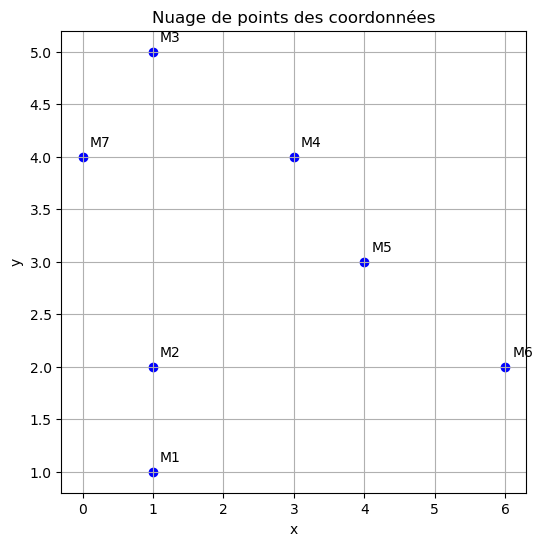

In [88]:
plt.figure(figsize=(6, 6))
plt.scatter(df['x'], df['y'], color='blue')

# Ajout des étiquettes
for name, (x, y) in points.items():
    plt.text(x + 0.1, y + 0.1, name)

plt.title("Nuage de points des coordonnées")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## 1.3 - Interprétation

- Répartition des coordonnées :
    - x est plus dispersé que y (écart-type : 2.14 vs 1.41).
    - x présente une asymétrie positive (médiane < moyenne).
    - y est plus symétrique (médiane = moyenne).
    - x couvre une plage de valeurs plus large (étendue : 6 vs 4).
- Visualisation :
  - A partir de x=2, il semble y avoir une tendance linéaire décroissante entre x et y.

---

# Partie 2 : Régression Linéaire Simple

Objectif : Explorer s’il existe une relation linéaire entre les coordonnées $x$ (variable indépendante) et $y$ (variable dépendante).

Nous allons :

- Calculer les coefficients de la droite de régression \( $\hat{y} = b_0 + b_1 x$ \)
- Tracer la droite de régression sur le nuage de points
- Calculer le coefficient de détermination \( $R^2$ \) pour évaluer la qualité de l'ajustement

## 2.1 - Calcul des Coefficients de Régression
Les coefficients de la droite de régression linéaire simple $\hat{y} = b_0 + b_1 x$ sont calculés comme suit : $$b_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$ et $b_0 = \bar{y}-b_1 \bar{x}$ où $\bar{x}$ et $\bar{y}$ sont les moyennes des coordonnées $x$ et $y$ respectivement, et $n$ est le nombre total de points.

In [89]:
# Extraire les données
x = df['x'].values
y = df['y'].values
n = len(x)

# Moyennes
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calcul de b1
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)
b1 = numerator / denominator

# Calcul de b0
b0 = mean_y - b1 * mean_x

print(f"Coefficient directeur (b1) : {b1:.4f}")
print(f"Ordonnée à l'origine (b0) : {b0:.4f}")

Coefficient directeur (b1) : -0.1458
Ordonnée à l'origine (b0) : 3.3333


- Coefficient directeur ($b_1 = -0.1458$) :
    - La pente est légèrement négative, ce qui indique une relation linéaire décroissante faible entre $x$ et $y$.
- Ordonnée à l’origine ($b_0 = 3.3333$) :
    - C’est la valeur prédite de y lorsque $x = 0$.

## 2.2 - Visualisation de la droite de régression
On superpose la droite de régression $\hat{y} = b_0 + b_1 x$ au nuage de points ce qui permet de :

- Visualiser la tendance générale entre x et y (relation croissante ou décroissante).
- Estimer les valeurs de y à partir de x par prédiction.
- Évaluer la qualité de l’ajustement : si les points sont proches de la droite, la relation linéaire est forte.
- Détecter les anomalies ou points aberrants qui s’éloignent fortement de la tendance.
- Simplifier l’analyse en résumant la relation entre les deux variables avec une équation simple.

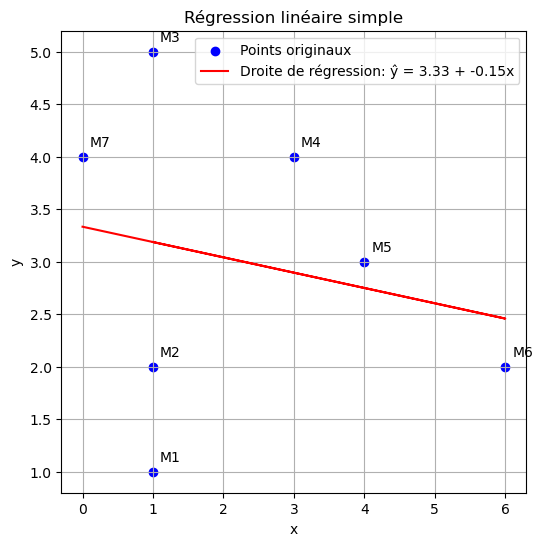

In [90]:
# Droite de régression
y_hat = b0 + b1 * x

# Affichage
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', label='Points originaux')
plt.plot(x, y_hat, color='red', label=f'Droite de régression: ŷ = {b0:.2f} + {b1:.2f}x')

# Étiquettes
for name, (xi, yi) in points.items():
    plt.text(xi + 0.1, yi + 0.1, name)

plt.title("Régression linéaire simple")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

On observe :

- Pente négative : La droite indique une relation décroissante légère entre $x$ et $y$. Plus $x$ augmente, plus $\hat{y}$ (la valeur prédite de $y$) diminue légèrement.
- Modèle linéaire faible : La pente étant faible (-0.15), la variation de $y$ en fonction de $x$ est peu marquée.
- Certaines valeurs sont très éloignées de la droite comme M1 et M3
- Le modèle ne prédit pas bien certaines valeurs, en particulier $x = 1$ où les $y$ sont très variés (1, 2, 5)

## 2.3 - Coefficient de détermination $R^2$
Le coefficient de détermination $R^2$ mesure la proportion de la variance totale de $y$ expliquée par la régression : $$R^2 = 1- \frac{SCE}{SCT} = \frac{SCR}{SCT}$$
où 

- $SCE = \sum_{i=1}^{n} (y_i - \hat{y})^2$ est la somme des carrés des erreurs
- $SCT = \sum_{i=1}^{n} (y_i - \bar{y})^2$ est la somme des carrés des totaux
- $SCR = \sum_{i=1}^{n} (\hat{y_i} - \bar{y})^2$ est la somme des carrés de la régression

### Calcul du SCT

In [91]:
# Somme des carrés totaux (SCT)
SCT = np.sum((y - mean_y) ** 2)
print(f"SCT = {SCT:.4f}")

SCT = 12.0000


### Calcul du SCE

In [92]:
# Somme des carrés des erreurs (SCE)
SCE = np.sum((y - y_hat) ** 2)
print(f"SCE = {SCE:.4f}")

SCE = 11.4167


### Calcul du SCR

In [93]:
# Somme des carrés de la régression (SCR)
SCR = np.sum((y_hat - mean_y) ** 2)
print(f"SCR = {SCR:.4f}")

SCR = 0.5833


### Calcul de $R^2$

In [94]:
# Coefficient de détermination
R2 = 1 - (SCE / SCT)
print(f"Coefficient de détermination R² : {R2:.4f}")
R2b = SCR / SCT
assert(round(R2b, 4) == round(R2, 4))

Coefficient de détermination R² : 0.0486


Les deux formules nous donne bien le même résultat

### Interprétation de $R^2 = 0.0486$ :

- Le modèle n'explique que 4.86 % de la variation totale des valeurs de y.
- Cela signifie que la droite de régression est très peu représentative des données.
- 95 % de la variation reste inexpliquée par le modèle linéaire → très faible pouvoir prédictif.

### Conclusion :

- L’ajustement linéaire ne convient pas bien aux données.
- Il existe probablement peu ou pas de relation linéaire entre x et y.
- Un autre type de modèle serait peut-être plus pertinent.

---

# Partie 3 : Estimation de l'erreur en Régression Linéaire Simple

Objectif : Étudier la qualité de l’ajustement du modèle par le calcul :

- des résidus
- de la somme des carrés des erreurs (SCE)
- de la variance estimée (MSE)
- de l’écart-type des erreurs

Cela permet de quantifier l’erreur aléatoire entre les observations réelles et celles prévues par le modèle.

## 3.1 - Résidus et somme des carrés des erreurs (SCE) 
Les résidus sont les écarts entre les valeurs observées et les valeurs prédites :
$$e_i = y_i - \hat{y_i} =y_i - (b_0 + b_1 x_i)$$
La somme des carrés des erreurs (SCE) est donnée par : $SCE = \sum_{i=1}^{n} (y_i - \hat{y})^2$

In [95]:
# Résidus : écart entre les valeurs observées et les valeurs prédites
residus = y - y_hat

# Somme des carrés des erreurs
SCE = np.sum(residus ** 2)

print(f"Résidus : {residus}")
print(f"Somme des carrés des erreurs (SCE) : {SCE:.4f}")

Résidus : [-2.1875     -1.1875      1.8125      1.10416667  0.25       -0.45833333
  0.66666667]
Somme des carrés des erreurs (SCE) : 11.4167


## 3.2 - Estimation de la variance des erreurs : MSE 
Une estimation non biaisée de la variance des erreurs aléatoires $\sigma^2$ est donnée par le MSE (Mean Squared Error) : 
$$\sigma^2 = MSE = \frac{SCE}{n-2}$$
Où $n$ est le nombre total d'observations et $n-2$ le degré de liberté.

Pourquoi $n - 2$ ?

Dans une régression linéaire simple, on estime deux paramètres :

- $b_0$ : l’ordonnée à l’origine,
- $b_1$ : le coefficient directeur.

Or, chaque paramètre estimé "consomme" un degré de liberté. Donc :

- Total de données : $n$ observations,
- Moins 2 paramètres estimés → il reste $n - 2$ degrés de liberté pour estimer la variance des erreurs.

Cela garantit une estimation non biaisée de la variance $\sigma^2$ des erreurs aléatoires


In [96]:
# MSE : estimation de la variance des erreurs (degrés de liberté = n - 2)
MSE = SCE / (n - 2)
print(f"Variance estimée des erreurs (MSE) : {MSE:.4f}")


Variance estimée des erreurs (MSE) : 2.2833


## 3.3 - Écart-type des erreurs
L'écart-type des erreurs est simplement la racine carrée de la variance : 
$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{SCE}{n-2}}$$

In [97]:
# Écart-type des erreurs
std_error = np.sqrt(MSE)
print(f"Écart-type des erreurs : {std_error:.4f}")


Écart-type des erreurs : 1.5111


## 3.4 - Interprétation

- Les résidus montrent les écarts individuels entre les observations et la droite ajustée, si les résidus semblent distribués aléatoirement autour de 0 alors le modèle est adapté.
- La SCE mesure l’erreur globale : plus elle est petite, plus le modèle colle aux données.
- Le MSE est une estimation non biaisée de la variance des erreurs. Plus il est faible, plus les prédictions sont proches des valeurs observées.
- L’écart-type des erreurs donne une idée de la dispersion moyenne autour de la droite.

Les résidus montrent que le modèle surestime plusieurs points faibles, et sous-estime plusieurs points forts. On peut en conclure que l’ajustement linéaire ne capte pas bien la tendance réelle des données.

La SCE de 11.4167 indique que les erreurs sont plutôt importantes, donc que le modèle n’ajuste pas bien les données.

L'écart-type des erreurs indique que les prédictions du modèle sont en moyenne à ±1.5 unités de la valeur réelle. Cela indique une incertitude importante pour un modèle de régression simple.

### Conclusion
Le modèle linéaire n’est pas un bon ajustement pour ces données, car le $R^2$ est très faible (4.86 %), les 
résidus sont importants (certains proches de ±2) et l'écart-type des erreurs est élevé par rapport à la plage des y.



---

# Partie 4 : Régression Linéaire Simple avec Tests Statistiques

Objectif : Tester si la relation entre $x$ et $y$ est statistiquement significative.

Nous allons :

- Calculer les erreurs standards des coefficients
- Effectuer des tests d’hypothèses (H₀ : b = 0) sur b₀ et b₁
- Construire des intervalles de confiance à 95%
- Interpréter les résultats via les valeurs de t et les p-valeurs


## 4.1 - Estimation de la variance des erreurs ${\sigma_\epsilon}^2$
Pour estimer la variance des erreurs (résidus), on utilise : ${\sigma_\epsilon}^2 = MSE = \frac{SCE}{n-2}$

où $SCE = \sum_{i=1}^{n} (y_i - \hat{y})^2$ est la somme des carrées des erreurs, et $n-2$ représente le degré de liberté. L'écrat-type des erreurs est : $\sigma = \sqrt{MSE}$

#### Voir 3.1 à 3.3

## 4.2 - Erreurs Standards des Coefficients 
Les erreurs standards permettent de mesurer la variabilité des estimations des coefficients : 

- Erreur standard de la pente : $SE_{b_1} = \frac{\sigma}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2}}$
- Erreur standard de l'ordonnée à l'origine : $SE_{b_0} = \sigma \sqrt{\frac{1}{n} + \frac{{\bar{x}^2}}{{\sum_{i=1}^{n} (x_i - \bar{x}^2)}}}$

In [98]:
# Erreur standard de b1 (pente)
SE_b1 = std_error / np.sqrt(np.sum((x - mean_x) ** 2))

# Erreur standard de b0 (ordonnée à l’origine)
SE_b0 = std_error * np.sqrt(1/n + (mean_x ** 2) / np.sum((x - mean_x) ** 2))

print(f"Erreur standard de b1 : {SE_b1:.4f}")
print(f"Erreur standard de b0 : {SE_b0:.4f}")

Erreur standard de b1 : 0.2885
Erreur standard de b0 : 0.8724


## 4.3 - Test d'Hypothèse pour la Pente ($b_1)$ et l'ordonnée à l'origine ($b_0$)
Hypothèses :

$H_0$ : $b_i = 0$ (pas de relation linéaire)

$H_1$ : $b_i \ne 0$ (relation linéaire significative

Statistique de test : $t = \frac{b_i - 0}{SE_{b_i}}$

### Calculs des statistiques de test $t$ et de la valeur critique

In [99]:
# Test t pour b1
t_b1 = b1 / SE_b1

# Test t pour b0
t_b0 = b0 / SE_b0

# Degrés de liberté
ddl = n - 2

# Valeur critique à 95%
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=ddl)

print(f"t statistique pour b1 : {t_b1:.4f}")
print(f"t statistique pour b0 : {t_b0:.4f}")
print(f"Valeur critique t (alpha=0.05, ddl={ddl}) : {t_crit:.4f}")

t statistique pour b1 : -0.5054
t statistique pour b0 : 3.8208
Valeur critique t (alpha=0.05, ddl=5) : 2.5706


### Loi suivie par la statistique t
La statistique $t$ suit une loi de Student à $n-2$ degré de liberté. Ici, $n = 7$, donc $ddl = 7-2 = 5$

### Interprétation avec la valeur critique

Avec un niveau de signification $\alpha = 0,05$ et un degré de liberté $ddl = 5$, la valeur critique t est :
$$t* = \pm 2.5706$$
On rejette $H_0$ si $|t| > t*$

| Coefficient | t-statistique | ∣t∣>2.5706 ? | Significatif ? |
|-------------|---------------|--------------|-----------------------------------------------------------------------|
| $b_1$           | -0.5054       | Non        | Pas significatif : la pente n’est pas différente de 0 au seuil de 5 % |
| $b_0$           | 3.8208        | Oui        | Significatif : l’ordonnée à l’origine est différente de 0             |

#### Conclusion :

- Le test t montre que le coefficient directeur ($b_1$) n’est pas significatif ⇒ il n’existe pas de preuve suffisante d’une relation linéaire entre x et y.
- En revanche, l’ordonnée à l’origine ($b_0$) est significativement différente de 0.

Cela renforce l'idée que le modèle linéaire n’est pas pertinent ici, car la pente n’est pas significative statistiquement.

### Calculs des p-valeurs

In [100]:
# p-valeurs associées aux t-statistiques (bilatéral)
p_b1 = 2 * (1 - t.cdf(abs(t_b1), df=ddl))
p_b0 = 2 * (1 - t.cdf(abs(t_b0), df=ddl))

print(f"p-valeur pour b1 : {p_b1:.4f}")
print(f"p-valeur pour b0 : {p_b0:.4f}")

p-valeur pour b1 : 0.6347
p-valeur pour b0 : 0.0124


### Principe de la p-valeur

La p-valeur mesure la probabilité d’obtenir une statistique aussi extrême que celle observée, sous l’hypothèse nulle $H_0$ : $b_i = 0$.

- Si p-valeur < $\alpha$ (0,05) → On rejette $H_0$ ⇒ le coefficient est statistiquement significatif.
- Si p-valeur > $\alpha$ (0,05) → On ne rejette pas $H_0$ ⇒ le coefficient n’est pas significatif.

| Coefficient | p-valeur | Interprétation |
|-------------|---------------|-----------------------------------------------------------------------|
| $b_1$           | 0.6347 | Non significatif : on ne rejette pas $H_0$⇒ la pente est probablement nulle, donc pas de relation linéaire significative entre $x$ et $y$ |
| $b_0$           | 0.0124 | Significatif : on rejette $H_0$ ⇒ l’ordonnée à l’origine est différente de 0.            |

### Conclusion avec p-valeurs :

- Le modèle ne met pas en évidence une relation linéaire significative entre $x$ et $y$, car $b_1$ n’est pas significatif.
- Seul $b_0$ (l’ordonnée à l’origine) est significatif, ce qui n'est pas suffisant pour valider un modèle linéaire utile.

Cela confirme que le modèle linéaire simple n’est pas adapté à ces données.

## 4.5 Intervalles de Confiance pour les Coefficients 
Un intervalle de confiance à ($1-\alpha ) \times 100%$ pour un coefficient $\beta$ est : 
$$\beta \pm t_{\alpha/2,n-2} \times SE_\beta$$
où $t_{\alpha/2,n-2}$ est la valeur critique de la loi de Student avec $n-2$ degré de liberté.

In [101]:
# Intervalle de confiance pour b1
IC_b1 = (b1 - t_crit * SE_b1, b1 + t_crit * SE_b1)

# Intervalle de confiance pour b0
IC_b0 = (b0 - t_crit * SE_b0, b0 + t_crit * SE_b0)

print(f"Intervalle de confiance à 95% pour b1 : {[round(float(a), 4) for a in IC_b1]}")
print(f"Intervalle de confiance à 95% pour b0 : {[round(float(a), 4) for a in IC_b0]}")

Intervalle de confiance à 95% pour b1 : [-0.8875, 0.5958]
Intervalle de confiance à 95% pour b0 : [1.0907, 5.576]


## 4.7 - Interprétation des Tests Statistiques

- Hypothèses testées :
  - H₀ : b₁ = 0 (pas de relation linéaire)
  - H₁ : b₁ ≠ 0 (relation significative)
- Si la p-valeur < 0.05, on rejette H₀ : le coefficient est significatif.

Un intervalle de confiance à 95 % représente l’ensemble des valeurs plausibles pour un coefficient.
- Si 0 ∉ intervalle de confiance, cela confirme également la significativité.

| Coefficient          | p-valeur | Intervalle de confiance à 95 % | Contient 0 ? | Significatif ? |
| -------------------- | -------- | ------------------------------ | ------------ | -------------- |
| $b_1$ (pente)    | 0.6347   | \[-0.8875, 0.5958]             | Oui        | Non          |
| $b_0$ (ordonnée) | 0.0124   | \[1.0907, 5.576]               | Non        | Oui          |


### Conclusion

Sur la base des p-valeurs et des intervalles de confiance :

* Aucune relation linéaire significative entre $x$ et $y$ ne peut être affirmée, car :

  * La pente $b_1$ n’est pas significative (p = 0.6347 > 0.05).
  * Son intervalle de confiance contient 0, ce qui confirme cette non-significativité.

* L’ordonnée à l’origine $b_0$ est significative, mais cela n’implique pas une relation linéaire entre $x$ et $y$.


### Conclusion finale :

> Il n’existe pas de preuve statistique suffisante pour conclure à une relation linéaire significative entre les coordonnées $x$ et $y$.
> Le modèle de régression linéaire simple n’est pas adapté à ces données.


---

# Partie 5 : Classification Ascendante Hiérarchique (CAH)

Objectifs :

- Comprendre l’algorithme de la CAH par fusion des points les plus proches
- Implémenter différentes fonctions de distance
- Appliquer la CAH à un jeu de données simple
- Visualiser le regroupement avec un dendrogramme

Nous utiliserons d’abord la distance euclidienne, puis comparerons avec d’autres distances.


## 5.1 - Fonction de calcul de distance
Distance euclidienne : $d = \sqrt{x_2 - x_1)^2 + (y_2 - y_1)^2}$

Distance Manhattan : $d = |x_2 -x_1|+|y_2 - y_1|$

Distance infinie : $d = \max\{|x_2 -x_1|+|y_2 - y_1|\}$

Distance de Ward :  

- Elle mesure l’augmentation de l’inertie intra-classe (ou de la variance totale) qui résulte de la fusion de deux groupes.
- Autrement dit, à chaque étape, on fusionne les deux clusters dont la réunion provoque la plus petite augmentation de la variance totale. 
- Elle vise à minimiser la perte d’homogénéité dans les groupes.
- Elle avorise la création de groupes compacts et homogènes.

In [102]:
def dist_euclidienne(p1: pd.Series, p2: pd.Series) -> float:
    '''Distance euclidienne entre 2 points'''
    return sqrt((p1['x'] - p2['x']) ** 2 + (p1['y'] - p2['y']) ** 2)

In [103]:
def dist_manhattan(p1: pd.Series, p2: pd.Series) -> float:
    '''Distance de manhattan entre 2 points'''
    return abs(p1['x'] - p2['x']) + abs(p1['y'] - p2['y'])

In [104]:
def dist_infinie(p1: pd.Series, p2: pd.Series) -> float:
    '''Distance infinie entre 2 points'''
    return max(abs(p1['x'] - p2['x']), abs(p1['y'] - p2['y']))

In [105]:
def dist_group(g1: str, g2: str, clusters: dict, df: pd.DataFrame, dist_func: Callable) -> float:
    '''Distance minimale entre groupes'''
    return min(dist_func(df.loc[p1], df.loc[p2]) for p1 in clusters[g1] for p2 in clusters[g2])

## 5.2 - Fonction dist_min
Ecrivez une fonction dist_min qui prend pour argument un tableau de points t et retourne un couple de points ((x, y), (x0, y0)) situés à une distance minimale l’un de l’autre.

Ici, on ajoute les paramètres clusters (dictionnaires des clusters existants) et dist_func (la fonction de calcul de distance utilisée).

In [106]:
def dist_min(t: pd.DataFrame, clusters: dict, dist_func: Callable) -> tuple:
    '''Retourne la paire de clusters les plus proches selon une fonction de distance donnée.'''
    
    # Liste des clés (identifiants des clusters)
    keys = list(clusters.keys())

    # Génère toutes les combinaisons uniques (i < j) d'indices de clusters
    combi = np.dstack(np.triu_indices(len(keys), k=1))[0]

    # Calcule les distances entre chaque paire de clusters avec la fonction fournie
    combi_dist = [
        dist_group(keys[i], keys[j], clusters, t, dist_func)
        for i, j in combi
    ]

    # Trouve l'indice de la paire avec la plus petite distance
    i, j = combi[np.argmin(combi_dist)]
    closest_pair = (keys[i], keys[j])

    return closest_pair


## 5.6 - Visualisation des clusters à chaque étape
Placer les points dans un repère orthonormé et remplir une matrice avec le carré de la distance euclidienne des points tracés. Regrouper sur le dessin, en les entourant d’une courbe, les deux points les plus proches pour former une classe Γ1. 

Remplir une deuxième matrice de distances en calculant les distances au plus proche voisin de la classe Γ1 avec les 5 points restants. Entourer la nouvelle classe Γ2. On aura au préalable écrit la distance d’un ensemble à un point. 

Poursuivre ainsi la classification jusqu’à ce que tous les points soient en une seule classe. On détaillera étape par étape les classes obtenues. 

Résoudre ces questions à la machine. 

In [107]:
def cah_steps(df: pd.DataFrame, dist_func: Callable) -> list:
    '''Fonction de clustering hiérarchique pour une distance donnée'''
    clusters = {label: [label] for label in df.index}
    steps = []

    while len(clusters) > 1:
        closest_pair = dist_min(df, clusters, dist_func)

        new_label = f"{closest_pair[0]}+{closest_pair[1]}"
        clusters[new_label] = clusters[closest_pair[0]] + clusters[closest_pair[1]]
        clusters.pop(closest_pair[0])
        clusters.pop(closest_pair[1])

        steps.append((deepcopy(clusters), closest_pair))
        
    return steps

In [108]:
def plot_cah_step(ax: mpl.axes.Axes, df: pd.DataFrame, clusters: dict, title: str) -> None:
    '''Fonction d'affichage côte à côte'''
    colors = plt.get_cmap('tab10')
    
    for i, (name, members) in enumerate(clusters.items()):
        c = colors(i % colors.N)
        x = [df.loc[m, 'x'] for m in members]
        y = [df.loc[m, 'y'] for m in members]

        ax.scatter(x, y, s=100, color=c, label=name)
        for m in members:
            ax.text(df.loc[m, 'x'] + 0.1, df.loc[m, 'y'] + 0.1, m, fontsize=8)
        for i1 in range(len(members)):
            for i2 in range(i1+1, len(members)):
                p1 = df.loc[members[i1]]
                p2 = df.loc[members[i2]]
                ax.plot([p1['x'], p2['x']], [p1['y'], p2['y']], color=c)

    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend(fontsize=6)

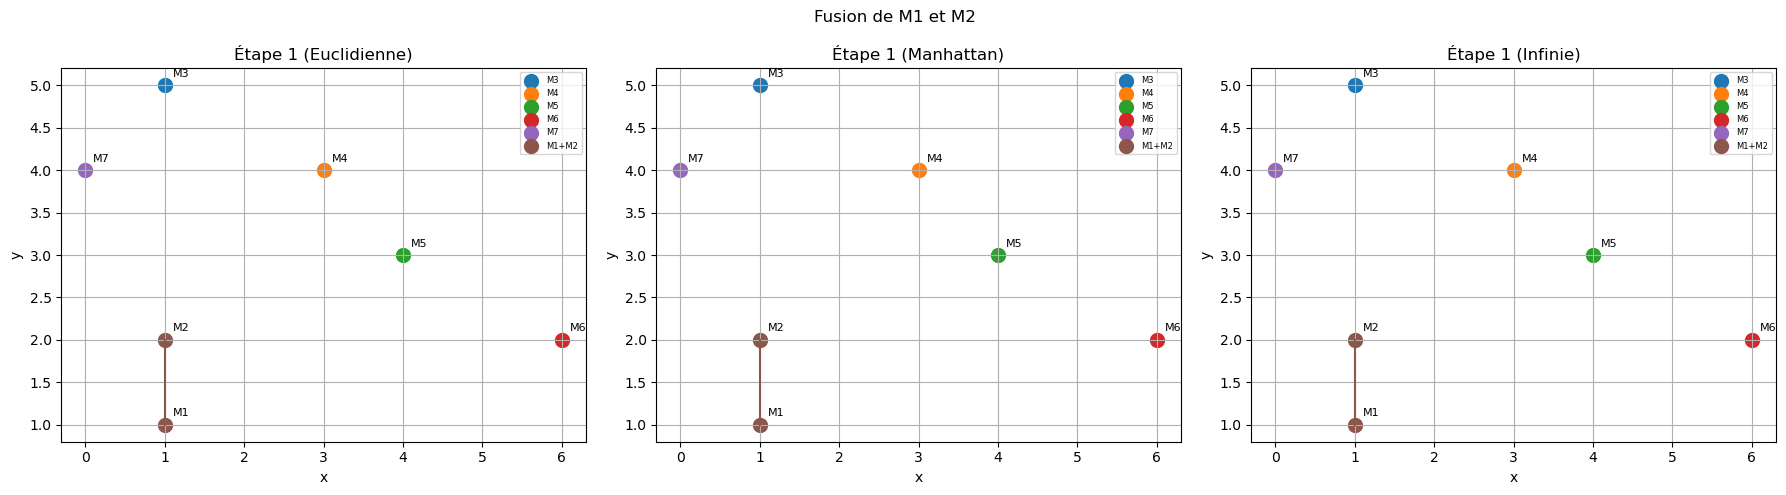

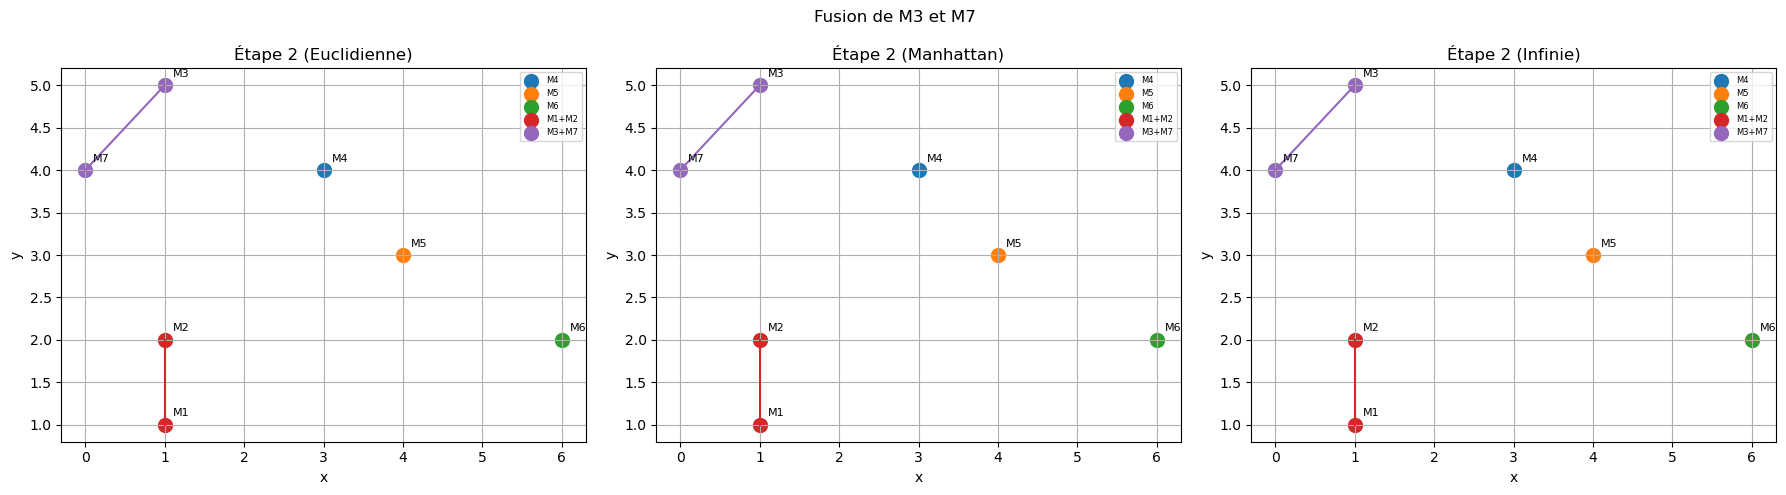

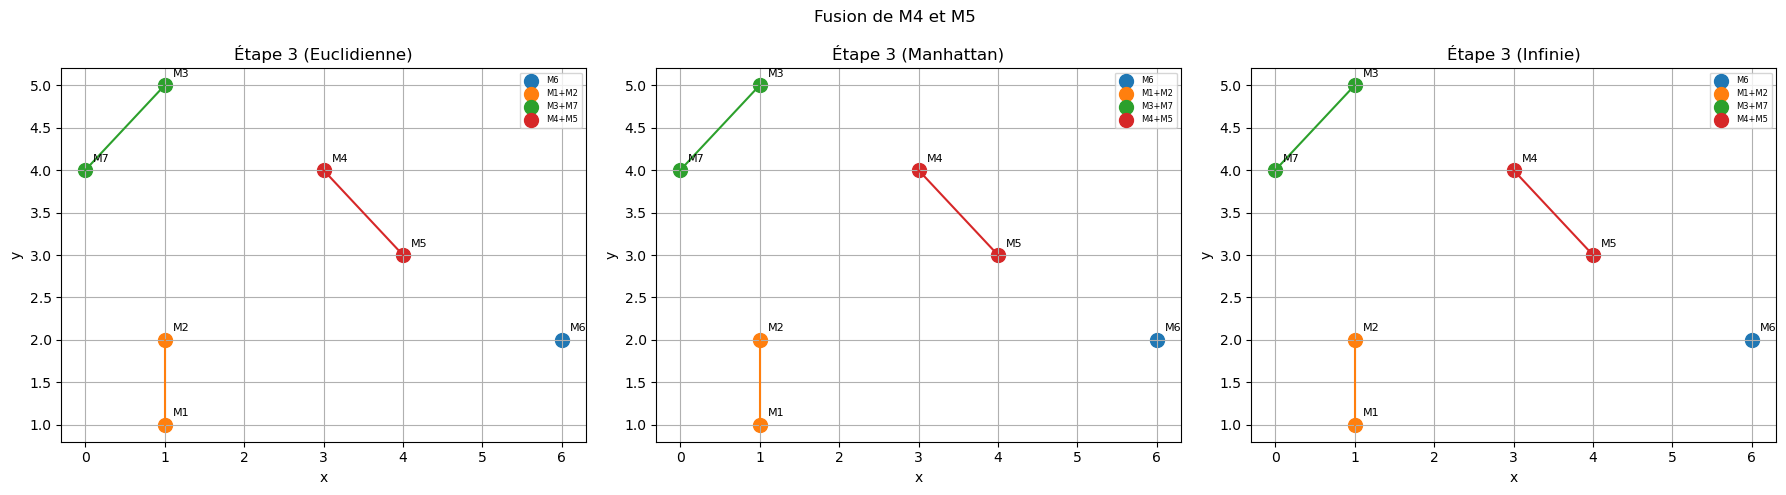

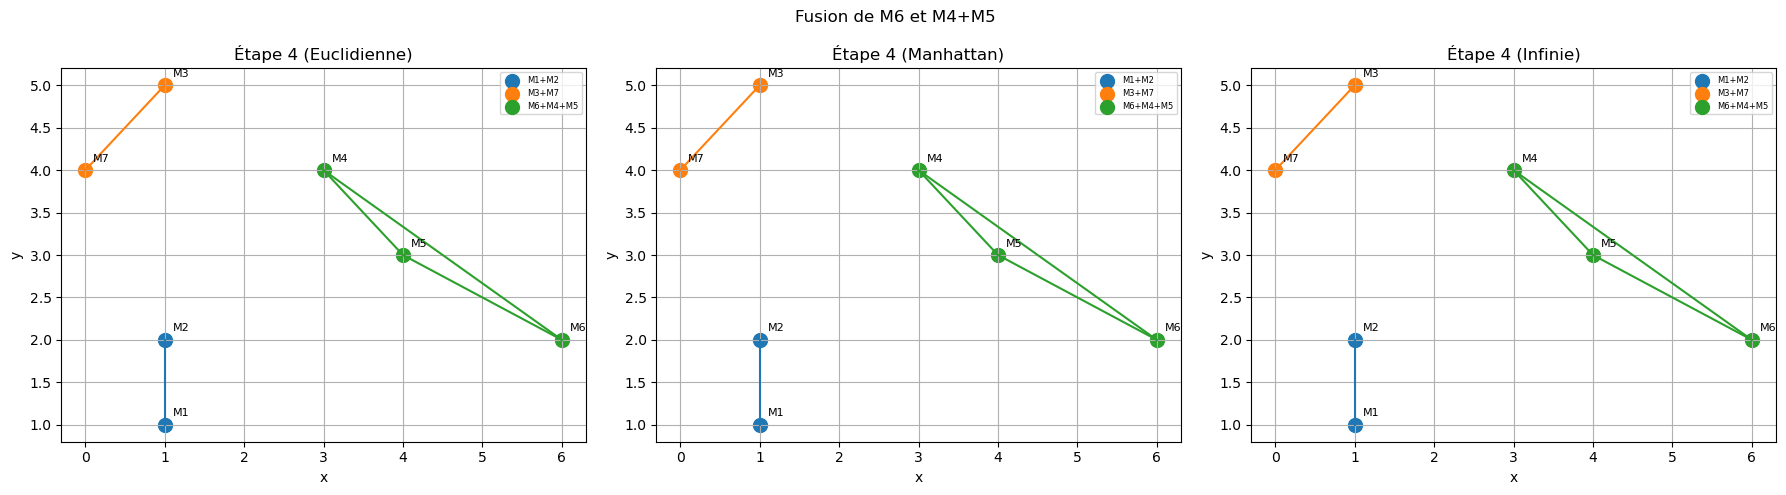

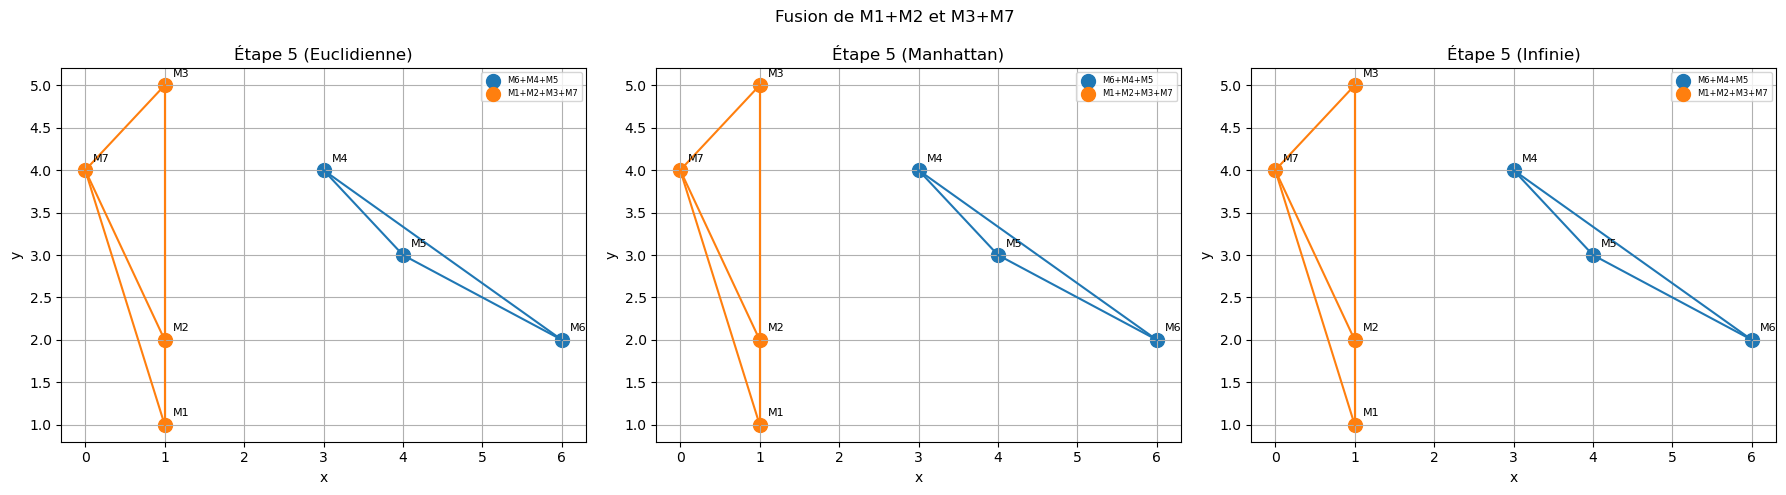

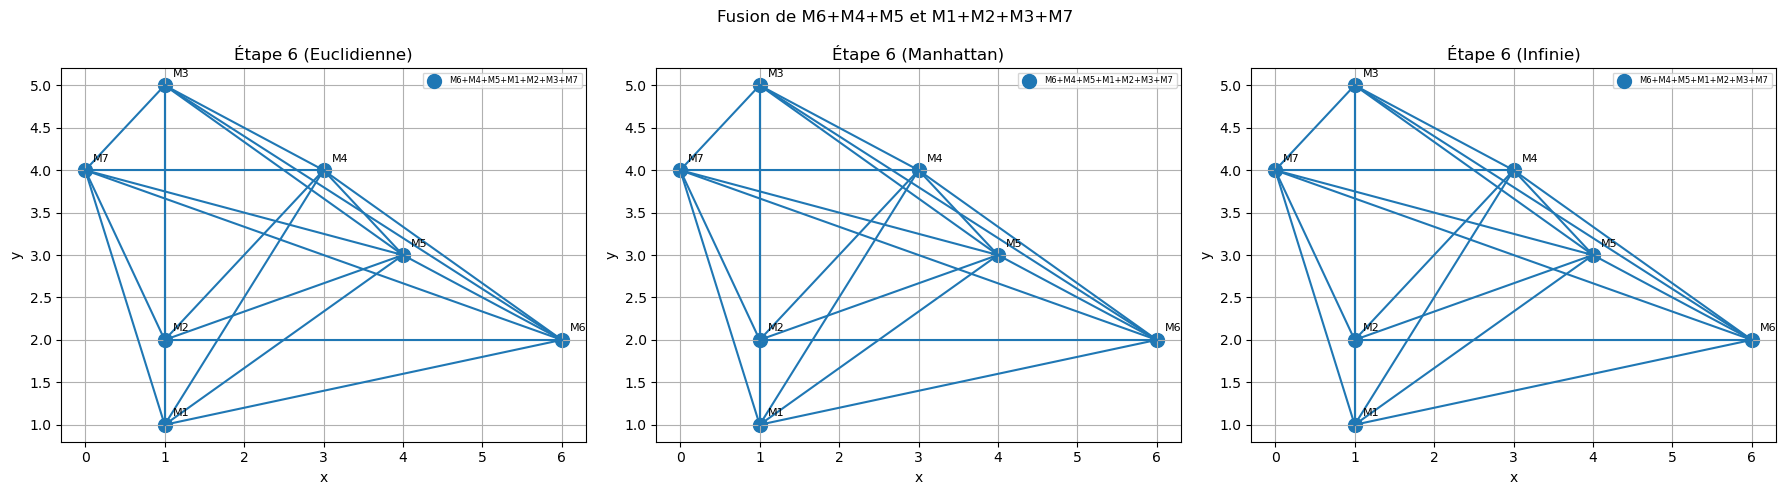

In [109]:
# Calcul des étapes pour chaque distance
steps_eucl = cah_steps(df, dist_euclidienne)
steps_manh = cah_steps(df, dist_manhattan)
steps_inf = cah_steps(df, dist_infinie)

# Nombre d'étapes (identique pour les trois méthodes)
n_steps = len(steps_eucl)

for step in range(n_steps):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    clusters_e, (a, b) = steps_eucl[step]
    clusters_m, _ = steps_manh[step]
    clusters_i, _ = steps_inf[step]
    
    plot_cah_step(axs[0], df, clusters_e, f"Étape {step+1} (Euclidienne)")
    plot_cah_step(axs[1], df, clusters_m, f"Étape {step+1} (Manhattan)")
    plot_cah_step(axs[2], df, clusters_i, f"Étape {step+1} (Infinie)")

    fig.suptitle(f"Fusion de {a} et {b}")
    plt.tight_layout()
    plt.show()

## 5.7 - Dendrogramme

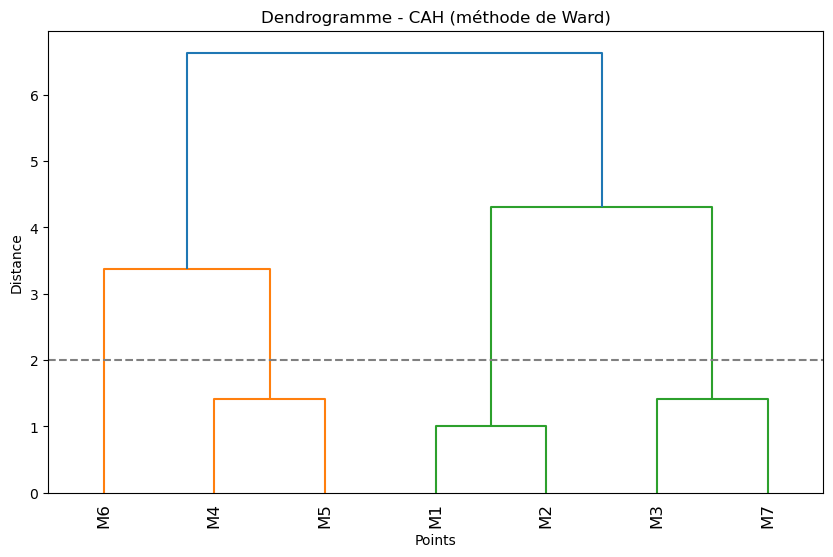

In [110]:
# CAH avec linkage (par défaut : euclidienne + méthode ward)
Z = linkage(df.values, method='ward')

# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=list(points.keys()), leaf_rotation=90)
plt.axhline(y=2, color='gray', linestyle='--')
plt.title("Dendrogramme - CAH (méthode de Ward)")
plt.xlabel("Points")
plt.ylabel("Distance")
# plt.grid(True)
plt.show()

### Interprétation

- Le dendrogramme montre l’ordre de regroupement des points.
- Plus une liaison est haute, plus la distance entre les groupes est grande.

Le trait en pointillé sur ce dendrogramme représente un seuil de distance utilisé pour découper l’arbre hiérarchique et ainsi déterminer un certain nombre de clusters (ou classes).

Ces classes sont les clusters formés à une distance maximale de 2 entre les points d’un même groupe.
On regarde les branches de l’arbre qui ne se rejoignent qu’à une distance supérieure à 2. 

À ce seuil, on observe 3 groupes formés avant la jonction au-dessus du trait :

- Cluster 1 : {M6, M4, M5}
- Cluster 2 : {M1, M2}
- Cluster 3 : {M3, M7}

## 5.8 - Dendrogramme de la matrice 29x9

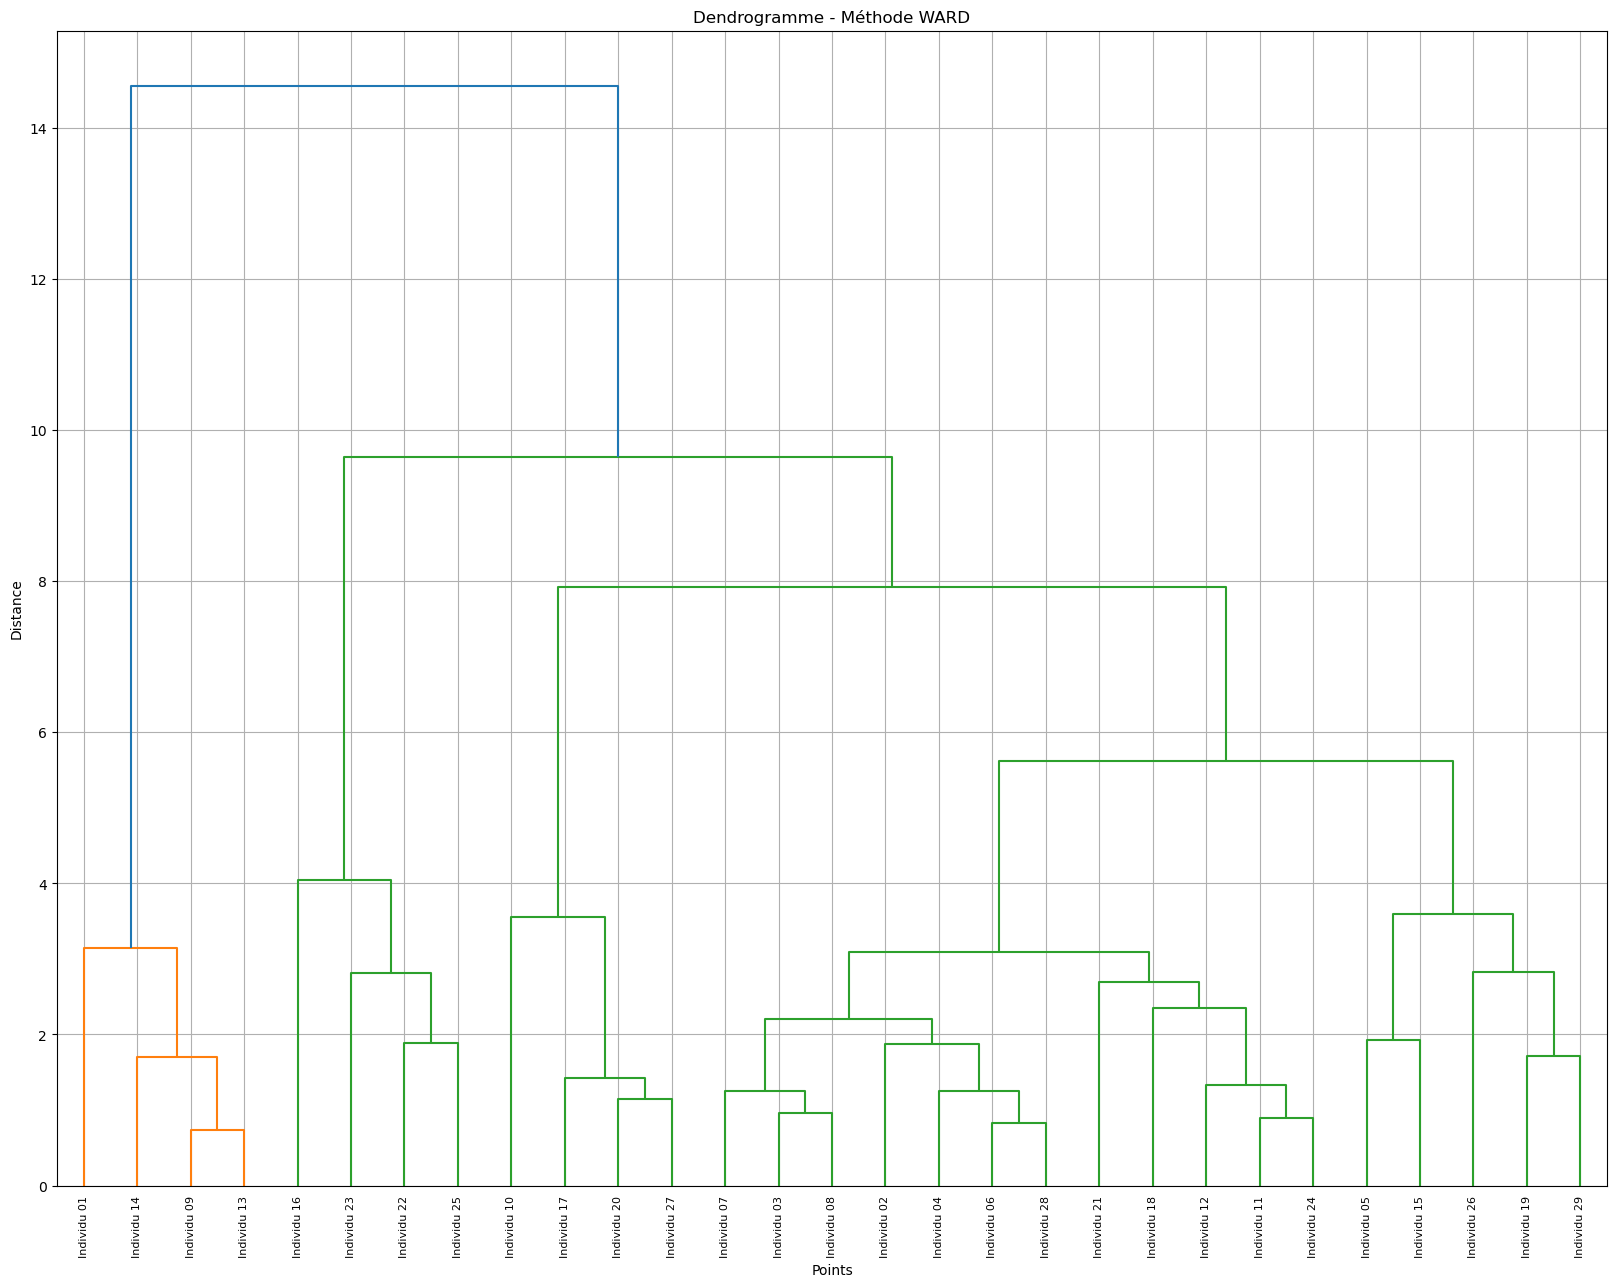

In [111]:
Z = linkage(X_hd, method='ward')

plt.figure(figsize=(20, 15))
dendrogram(Z, labels=individus, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogramme - Méthode WARD")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Partie 6 : Évaluation et Validation du Clustering

Objectifs :

- Évaluer la qualité des regroupements obtenus par la CAH
- Utiliser des indices : silhouette, Dunn, etc.
- Comparer avec d'autres méthodes comme K-Means
- Interpréter les résultats


## 6.1 - Classification Ascendante Hiérarchique (CAH)

In [112]:
# Découpage en 3 clusters (modifiable)
clusters_hd = fcluster(Z, t=3, criterion='maxclust')
print(f"Découpage en {len(np.unique(clusters_hd))} clusters")

Découpage en 3 clusters


### L’indice de silhouette (Silhouette Score) 

In [113]:
silhouette_hd = silhouette_score(X_hd, clusters_hd)
print(f"Silhouette Score {np.shape(X_hd)} : {silhouette_hd:.4f}")

Silhouette Score (29, 9) : 0.4006


### L’indice de Dunn 

In [114]:
def dunn_index(X: np.ndarray, labels: np.ndarray) -> float:
    '''Calcule l'indice de Dunn pour évaluer la qualité d'une partition en clusters.'''
    clusters = {k: X[labels == k] for k in np.unique(labels)}
    
    # Distance minimale entre clusters
    min_inter = np.inf
    for (_, v1), (_, v2) in combinations(clusters.items(), 2):
        for p1 in v1:
            for p2 in v2:
                dist = np.linalg.norm(p1 - p2)
                if dist < min_inter:
                    min_inter = dist

    # Diamètre (distance max intra-cluster)
    max_intra = 0
    for v in clusters.values():
        for p1, p2 in combinations(v, 2):
            dist = np.linalg.norm(p1 - p2)
            if dist > max_intra:
                max_intra = dist

    return min_inter / max_intra if max_intra != 0 else 0

In [115]:
dunn_hd = dunn_index(X_hd, clusters_hd)
print(f"Indice de Dunn : {dunn_hd:.4f}")

Indice de Dunn : 0.4756


In [116]:
# Ajouter cluster au DataFrame d'origine
df_clustered = pd.DataFrame(X_hd, index=df_hd.index)
df_clustered['cluster'] = clusters_hd
df_clustered

,0,1,2,3,4,5,6,7,8,cluster
,,,,,,,,,,
Individu 01,-2.547004,-1.115157,0.420466,-2.598646,-1.038716,-0.877677,-2.349697,-2.218964,-1.165803,1
Individu 02,0.232136,-0.656307,0.452739,0.643618,-0.773373,-0.808229,-0.375649,0.195060,0.272848,3
Individu 03,0.232136,0.392493,-0.845190,0.393250,-0.221628,-0.591205,0.238499,0.195060,-0.626309,3
Individu 04,-0.022526,-0.047629,1.056100,-0.107486,-0.301652,-0.547800,0.457838,-0.165242,-0.086815,3
Individu 05,0.774677,2.078064,-0.333034,0.881467,0.671273,0.025145,-0.214801,0.915664,-0.176731,3
Individu 06,0.099269,0.579778,0.232442,0.055254,0.233246,-0.426266,-0.068575,0.195060,0.272848,3
Individu 07,0.608593,0.205207,-0.095899,0.480879,-0.676502,-0.539119,0.326235,0.555362,-0.176731,3
Individu 08,-0.000382,0.120928,-0.407402,-0.094967,-0.613325,-0.782186,0.136141,-0.165242,-0.446478,3
Individu 09,-1.749800,-1.761293,-1.508887,-1.722358,-0.175298,0.641494,-1.574701,-1.966753,-1.525466,1


In [117]:
# Moyenne des clusters (centre)
centroids = df_clustered.groupby('cluster').mean()
centroids

,0,1,2,3,4,5,6,7,8
cluster,,,,,,,,,
1,-2.195459,-1.548255,-0.729428,-2.238742,-0.522771,0.300766,-1.896397,-2.029805,-1.413071
2,-0.260580,0.237982,-0.821336,-0.166948,1.997989,1.826448,-0.324470,-0.345393,-0.244168
3,0.467817,0.249576,0.295384,0.458227,-0.280994,-0.405184,0.423022,0.452419,0.315665


### Cohésion et séparation

In [118]:
# Cohésion
cohesion = 0
for i, row in df_clustered.iterrows():
    cluster_id = row['cluster']
    vector = row.drop('cluster')
    centroid = centroids.loc[cluster_id]
    cohesion += np.linalg.norm(vector - centroid)

# Séparation entre centroïdes
separation = 0
centroid_vals = centroids.values
for i in range(len(centroid_vals)):
    for j in range(i + 1, len(centroid_vals)):
        separation += np.linalg.norm(centroid_vals[i] - centroid_vals[j])

print(f"Cohésion intra-cluster : {cohesion:.4f}")
print(f"Séparation inter-cluster : {separation:.4f}")

Cohésion intra-cluster : 51.2785
Séparation inter-cluster : 14.6867


## 6.2 - Validation croisée 

### Kmeans

K-means est un algorithme de clustering (regroupement) qui divise un ensemble de données en K groupes (clusters), en fonction de la proximité des points. Le but est de minimiser la distance totale entre les points et leur centroïde, donc former des groupes compacts et bien séparés.

####  Fonctionnement

1. Choisir K (le nombre de groupes à former).
2. Placer K centres (centroïdes) de manière aléatoire.
3. Attribuer chaque point au centroïde le plus proche (selon la distance euclidienne).
4. Recalculer les centres : chaque centroïde devient le centre des points qui lui sont associés.
5. Répéter les étapes 3 et 4 jusqu’à ce que les groupes ne changent plus.

In [119]:
# KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(X_hd)

### Dbscan

DBSCAN (*Density-Based Spatial Clustering of Applications with Noise*) est un algorithme de clustering basé sur la densité.
Il regroupe les points qui sont proches les uns des autres (zones denses) et identifie les points isolés comme du bruit.


#### Fonctionnement

DBSCAN utilise deux paramètres :

* `eps` : la distance maximale entre deux points pour qu’ils soient considérés comme voisins.
* `min_samples` : le nombre minimal de voisins qu’un point doit avoir pour être considéré comme un noyau (core).

1. Trouver les points noyaux (assez de voisins dans un rayon `eps`).
2. Connecter les points proches aux noyaux → former des clusters.
3. Les points non connectés à un noyau sont considérés comme du bruit.


In [120]:
# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_clusters = dbscan.fit_predict(X_hd)

### Validation externe 

In [121]:
def safe_silhouette(X: np.ndarray, labels: np.ndarray) -> float:
    '''Calcule le score de silhouette si les labels sont valides, sinon retourne -1.'''
    if len(set(labels)) > 1 and -1 not in set(labels):  # -1 = bruit dans DBSCAN
        return silhouette_score(X, labels)
    return -1  # Cas où DBSCAN renvoie un seul cluster ou du bruit

In [122]:
print(f"Silhouette Score CAH     : {safe_silhouette(X_hd, clusters_hd):.4f}")
print(f"Silhouette Score KMeans  : {safe_silhouette(X_hd, kmeans_clusters):.4f}")
print(f"Silhouette Score DBSCAN  : {safe_silhouette(X_hd, dbscan_clusters):.4f}")
print(f"ARI CAH - KMeans    : {adjusted_rand_score(clusters_hd,kmeans_clusters):.4f}")
print(f"ARI CAH - DBSCAN    : {adjusted_rand_score(clusters_hd,dbscan_clusters):.4f}")
print(f"ARI DBSCAN - Kmeans : {adjusted_rand_score(dbscan_clusters, kmeans_clusters):.4f}")

Silhouette Score CAH     : 0.4006
Silhouette Score KMeans  : 0.3603
Silhouette Score DBSCAN  : 0.4907
ARI CAH - KMeans    : 0.5924
ARI CAH - DBSCAN    : 0.5656
ARI DBSCAN - Kmeans : 0.3811


#### Visualisation des performances

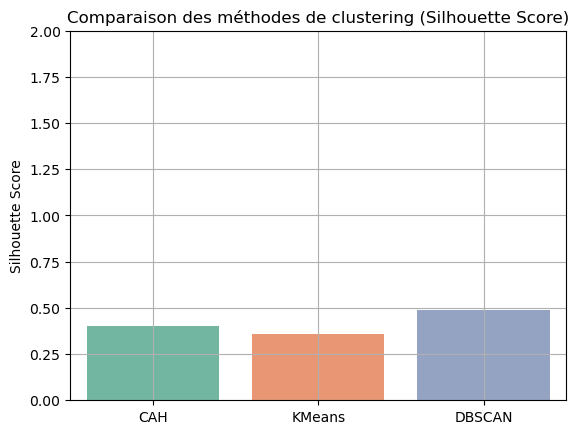

In [123]:
methods = ['CAH', 'KMeans', 'DBSCAN']
scores = [
    safe_silhouette(X_hd, clusters_hd),
    safe_silhouette(X_hd, kmeans_clusters),
    safe_silhouette(X_hd, dbscan_clusters)
]

sns.barplot(x=methods, y=scores, hue=methods, palette="Set2")
plt.title("Comparaison des méthodes de clustering (Silhouette Score)")
plt.ylabel("Silhouette Score")
plt.ylim(0, 2)
plt.grid(True)
plt.show()

## 6.3 - Interprétation des résultats 

### Qualité de la classification (3 clusters)

* Silhouette Score (0.4006) :
  → Score modéré → les clusters sont relativement bien séparés, mais pas parfaitement.

  > (Rappel : proche de 1 = très bon, proche de 0 = chevauchement).

* Indice de Dunn (0.4756) :
  → Indique un compromis modéré entre cohésion (clusters compacts) et séparation (clusters bien distincts).

  > Plus c’est élevé, mieux c’est.

* Cohésion intra-cluster : 51.28
  → Mesure à quel point les points sont proches les uns des autres dans chaque cluster.

  > Plus c’est faible, plus les clusters sont compacts.

* Séparation inter-cluster : 14.69
  → Mesure la distance entre les clusters.

  > Plus c’est grand, mieux c’est.

### Comparaison des méthodes (Silhouette Score)

* DBSCAN (0.4907) > CAH (0.4006) > KMeans (0.3603)
  → DBSCAN donne les meilleurs regroupements en termes de forme et densité.

### Comparaison entre méthodes (ARI – Adjusted Rand Index)

* CAH vs KMeans : 0.5924
  → Bonne similarité entre les deux partitions.

* CAH vs DBSCAN : 0.5656

* DBSCAN vs KMeans : 0.3811
  → DBSCAN classe les données différemment de KMeans.

### Conclusion

* Les 3 méthodes produisent des résultats globalement cohérents, mais DBSCAN semble offrir les groupes les plus cohérents et bien séparés (selon la silhouette).
* Les différences entre méthodes sont non négligeables, ce qui peut suggérer que les structures de clusters ne sont pas parfaitement équilibrées, et que la densité joue un rôle (d'où la performance de DBSCAN).


In [124]:
pd.DataFrame({
    "1 - mean": df_hd[clusters_hd == 1].mean(),
    "1 - median": df_hd[clusters_hd == 1].median(),
    "1 - std": df_hd[clusters_hd == 1].std(),
    "2 - mean": df_hd[clusters_hd == 2].mean(),
    "2 - median": df_hd[clusters_hd == 2].median(),
    "2 - std": df_hd[clusters_hd == 2].std(),
    "3 - mean": df_hd[clusters_hd == 3].mean(),
    "3 - median": df_hd[clusters_hd == 3].median(),
    "3 - std": df_hd[clusters_hd == 3].std(),
}).transpose()

,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
1 - mean,101.750000,44.750000,133.750000,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000
1 - median,97.500000,33.000000,120.550000,5.650000,56.700000,20.200000,7.650000,16.500000,10.500000
1 - std,33.049206,31.941353,61.849845,3.430622,10.462154,9.121906,2.287648,8.883505,1.892969
2 - mean,276.500000,235.500000,127.200000,22.825000,115.000000,34.050000,17.950000,65.000000,24.250000
2 - median,278.000000,234.000000,110.050000,22.450000,109.700000,34.400000,18.650000,65.000000,22.500000
2 - std,57.512318,71.635652,64.445170,4.551465,25.988587,2.725803,5.133225,12.909944,8.655441
3 - mean,342.285714,236.738095,206.785714,27.819048,60.890476,8.342857,23.061905,87.142857,30.476190
3 - median,338.000000,238.000000,211.100000,28.000000,57.600000,5.700000,22.400000,80.000000,28.000000
3 - std,36.318236,96.283646,66.908746,3.043948,13.116741,8.062665,4.434577,16.168753,10.186359


Les clusters sont bien distincts sur le plan des niveaux de variables.

- Cluster 1 : Faibles valeurs, peu dispersées → groupe « modeste »
- Cluster 2 : Valeurs moyennes, assez dispersées → groupe « intermédiaire »
- Cluster 3 : Valeurs très élevées, plus hétérogènes → groupe « dominant ou extrême »

## 6.4 - Analyse critique de la méthode

CAH avec méthode ward...
CAH avec méthode complete...
CAH avec méthode average...
CAH avec méthode single...


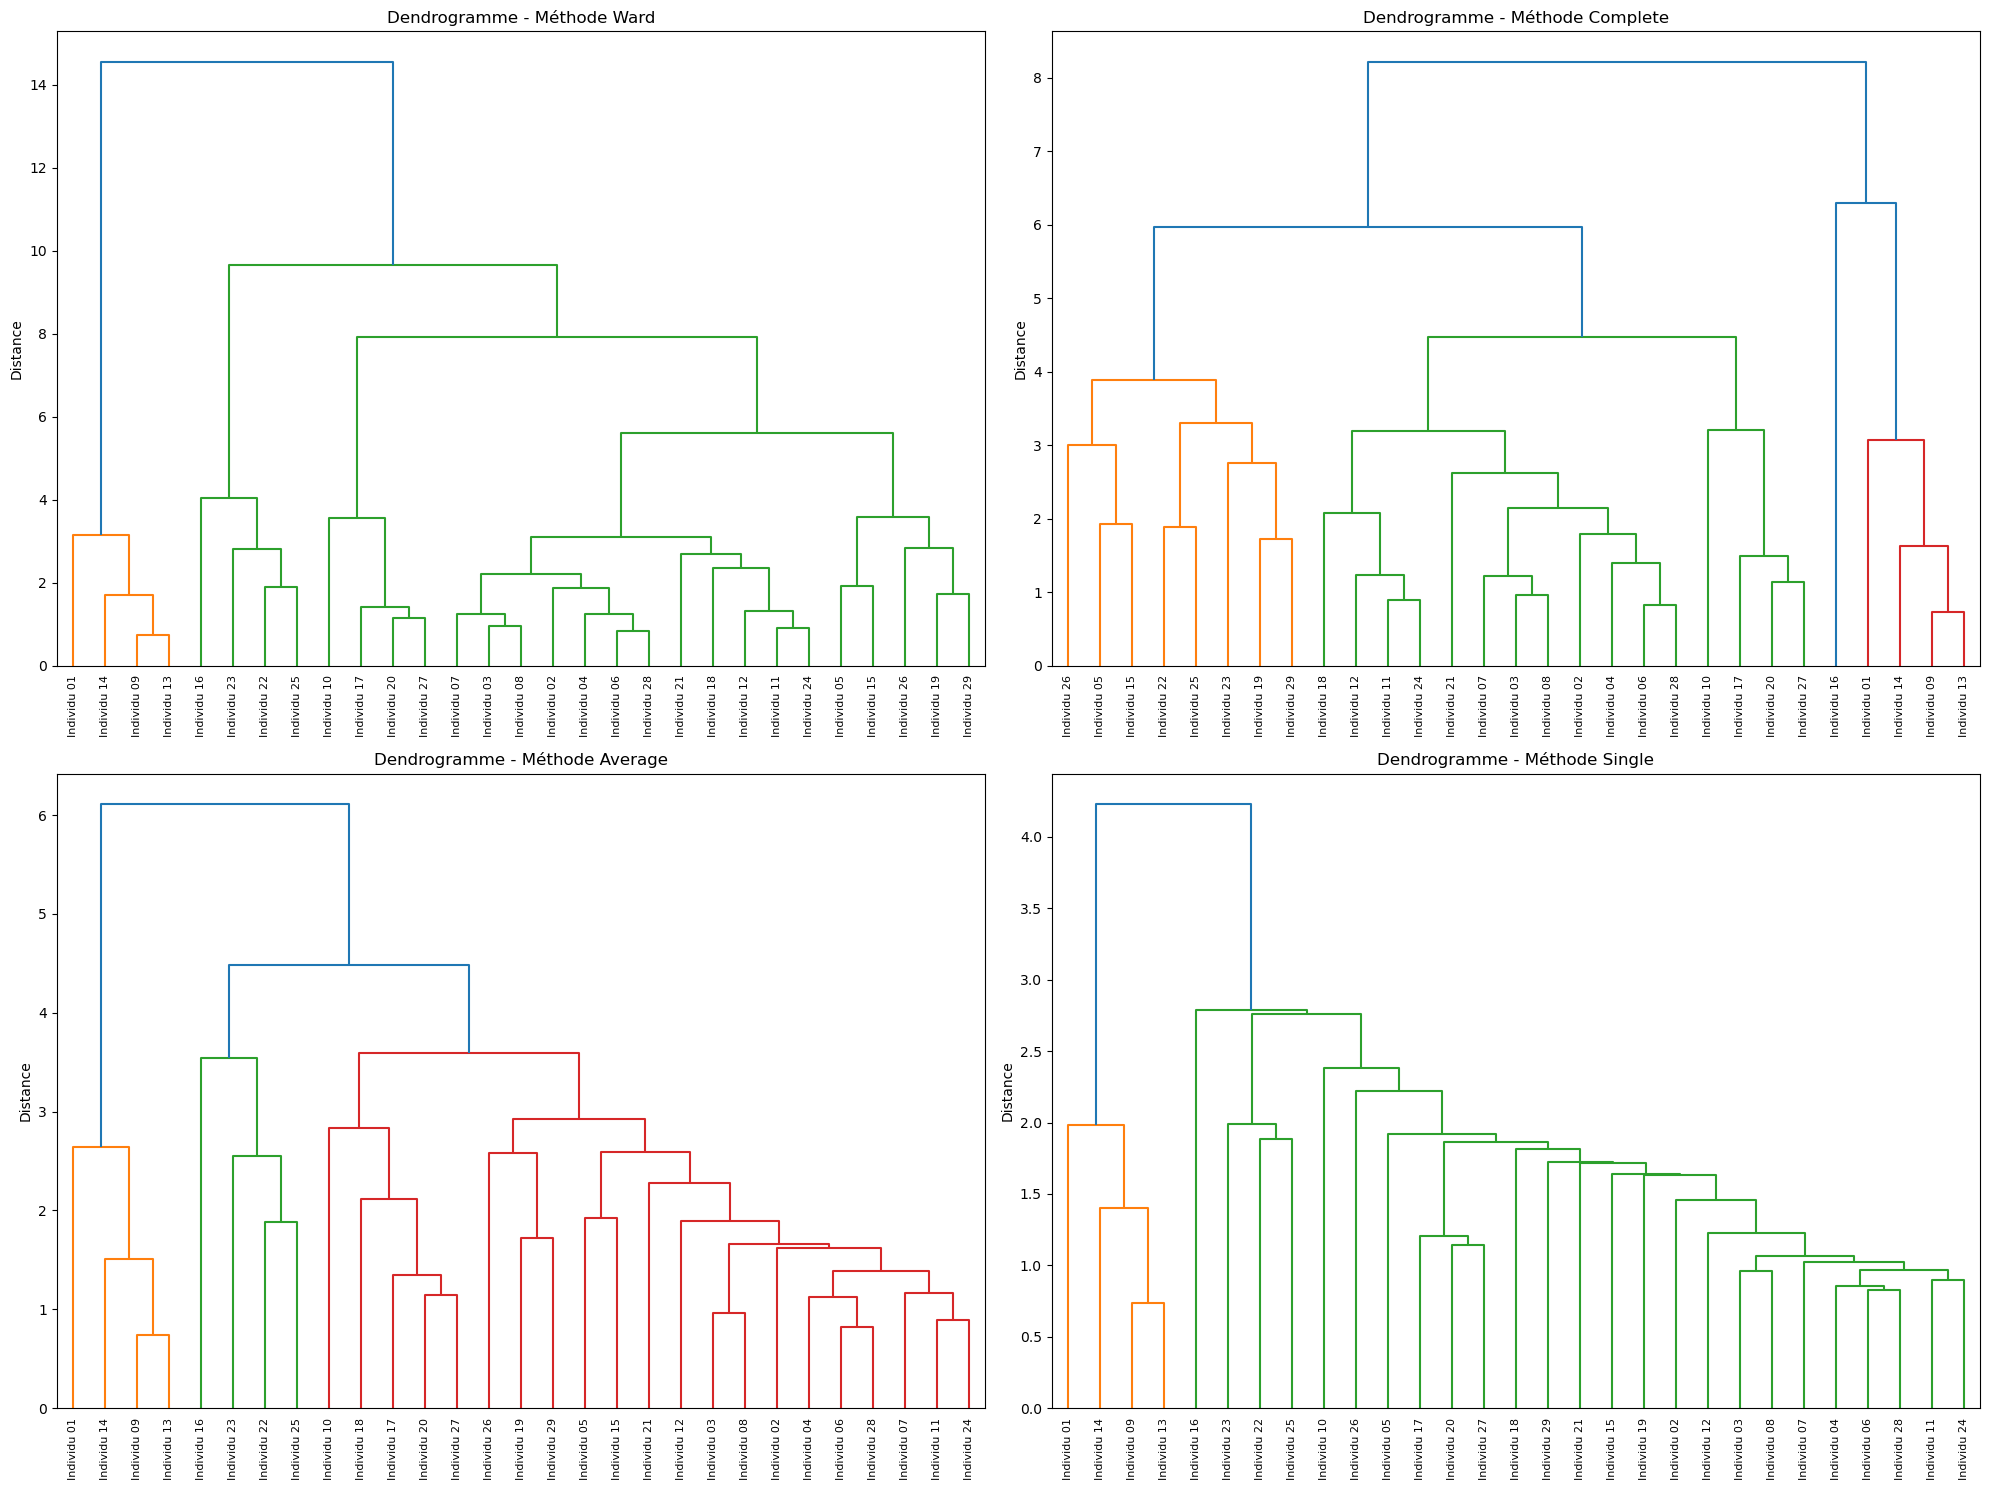

In [125]:
# CAH avec différentes méthodes de linkage
linkage_methods = ['ward', 'complete', 'average', 'single']
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

linkage_results = {}

for i, method in enumerate(linkage_methods):
    print(f"CAH avec méthode {method}...")
    
    # Calcul de la matrice de linkage
    Z = linkage(X_hd, method=method)
    
    linkage_results[method] = Z
    
    # Création du dendrogramme
    dendrogram(Z, labels=individus, ax=axes[i], leaf_rotation=90, leaf_font_size=8)
    axes[i].set_title(f'Dendrogramme - Méthode {method.capitalize()}')
    axes[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Utilisation de la méthode de Ward pour la suite (recommandée pour les données continues)
Z_ward = linkage_results['ward']

In [126]:
def cluster_and_label(X: np.ndarray, method: str, k: int= 3) -> np.ndarray:
    '''Effectue un clustering hiérarchique et assigne un label à chaque point.'''
    Z = linkage(X, method=method)
    return fcluster(Z, t=k, criterion='maxclust')

In [127]:
def test_sensitivity(X: np.ndarray, method: str, n_trials: int= 20, eps: float= 0.05, k: int= 3) -> np.float64:
    '''Évalue la sensibilité d'un algorithme de clustering à de petites perturbations des données.'''
    
    base_labels = cluster_and_label(X, method, k)  # Clustering de référence sur les données d'origine
    scores = []

    for _ in range(n_trials):
        # Génère une version bruitée des données en ajoutant un bruit gaussien léger
        perturbed = X + np.random.normal(loc=0.0, scale=eps, size=X.shape)
        
        # Recalcule les labels sur les données perturbées
        perturbed_labels = cluster_and_label(perturbed, method, k)
        
        # Compare les labels d'origine et ceux des données bruitées
        score = adjusted_rand_score(base_labels, perturbed_labels)
        scores.append(score)

    # Retourne la moyenne des scores de similarité
    return np.mean(scores)

In [128]:
def test_robustness(X: np.ndarray, method: str, noise_strength: float=5.0, k:int =3) -> float:
    '''Évalue la robustesse d'un algorithme de clustering face à un point bruité.'''
    
    base_labels = cluster_and_label(X, method, k)
    
    noise_point = X.max(axis=0) # Générer un point bruité très éloigné
    X_aug = np.vstack([X, noise_point]) # Ajouter à X

    new_labels = cluster_and_label(X_aug, method, k)
    
    # Comparer les 29 premiers points (hors bruit)
    return adjusted_rand_score(base_labels, new_labels[:len(X)])

In [129]:
print("Sensibilité (ARI moyen sur perturbations) :")
for m in linkage_methods:
    score = test_sensitivity(X_hd, m, eps=1, n_trials=20, k=3)
    print(f"{m:8} → {score:.4f}")

print()

print("Robustesse (ARI avec outlier ajouté) :")
for m in linkage_methods:
    score = test_robustness(X_hd, m, noise_strength=5, k=3)
    print(f"{m:8} → {score:.4f}")

Sensibilité (ARI moyen sur perturbations) :
ward     → 0.4002
complete → 0.4390
average  → 0.5372
single   → 0.4415

Robustesse (ARI avec outlier ajouté) :
ward     → 0.3241
complete → 0.9766
average  → 0.5656
single   → 0.8527


### Limites du critère de distance dans la CAH

* Le choix de la méthode de linkage (Ward, single, complete, average) influence fortement la forme des clusters.
* Ces méthodes sont sensibles à :
  * La présence d’outliers ou points aberrants
  * La distribution non homogène des distances

### Sensibilit
La sensibilité mesure l’impact de petites perturbations dans les données (bruit, fluctuations) sur les résultats.
* Evalué avec l'ARI moyens sur perturbations :

  * `average` (0.4881) > `complete` > `ward` > `single` (0.3551)
→ La méthode average est la moins sensible (donc plus stable).

Les méthodes Ward et Single sont les plus sensibles, donc peu fiables si les données sont instables ou bruitées.

### Robustesse
La robustesse mesure la résistance aux outliers.
* Evalué avec l'ARI avec outlier ajouté :

  * `complete` (0.9766) > `single` > `average` > `ward` (0.3241)
→ `Complete linkage` est très robuste, car il se base sur les distances les plus éloignées, donc peu influencé par des points isolés.

Ward, bien qu’efficace pour des groupes compacts, est très sensible aux valeurs aberrantes.

### Faut-il modifier les données ?

Oui, prétraiter les données est recommandé :

* Standardisation des variables (centrage-réduction)
* Suppression ou atténuation des outliers (winsorisation, PCA)
* Utilisation de métriques adaptées si variables de types différents

### Alternatives possibles

Si la méthode basée sur les distances n’est pas satisfaisante, on peut envisager :

* KMeans : plus robuste aux perturbations si les clusters sont bien sphériques (mais nécessite de fixer *k*)
* DBSCAN : robuste aux outliers, ne nécessite pas de fixer *k*, mais sensible aux paramètres ε et minPts
* Approches mixtes : prétraitement par PCA + clustering

### Conclusion

* Aucune méthode n’est parfaite : il faut adapter la méthode au jeu de données, tester plusieurs linkage/distance, évaluer la stabilité et la robustesse.
* Complete linkage semble ici le meilleur compromis entre robustesse et sensibilité.


## 6.5 - Visualisation avancée

### Standardisation des données
Prérequis de l'Analyse en Composantes Principales (ACP)

L'ACP cherche à maximiser la variance dans les données pour identifier les axes principaux (composantes). Si les variables sont dans des ordres de grandeurs différents, alors les variables avec les plus grandes valeurs absolues vont dominer le calcul de la variance.
Dans ce cas l'ACP va mal refléter la structure réelle des données.

Standardiser = centrer et réduire :
Pour chaque variable $X$, on applique :
$$Z = \frac{X - \mu}{\sigma}$$
où $\mu$ est la moyenne, $\sigma$ est l'écart-type.

In [130]:
# Sélectionner uniquement les colonnes numériques
X_numeric = df_hd.select_dtypes(include='number')

# Appliquer la standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Recréer un DataFrame avec les bons noms de colonnes et d'index
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=df_hd.index)

In [131]:
print("Données standardisées:")

pd.DataFrame({
    "Moyennes après standardisation": X_scaled_df.mean(),
    "Écarts-types après standardisation": X_scaled_df.std(),
}).transpose()

Données standardisées:


,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
Moyennes après standardisation,-1.110223e-16,9.188053e-17,2.297013e-17,3.656079e-16,2.297013e-17,9.188053e-17,-3.947991e-16,-1.856752e-16,3.062684e-17
Écarts-types après standardisation,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00


In [132]:
print("Statistiques descriptives des données après standardisation:")

X_scaled_df.describe()

Statistiques descriptives des données après standardisation:


,Données 1,Données 2,Données 3,Données 4,Données 5,Données 6,Données 7,Données 8,Données 9
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,-1.110223e-16,9.188053e-17,2.297013e-17,3.656079e-16,2.297013e-17,9.188053e-17,-3.947991e-16,-1.856752e-16,3.062684e-17
std,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00,1.017700e+00
min,-2.547004e+00,-1.761293e+00,-1.587464e+00,-2.598646e+00,-1.283000e+00,-1.025253e+00,-2.349697e+00,-2.327055e+00,-1.525466e+00
25%,-8.895996e-02,-6.563073e-01,-7.413554e-01,-9.496711e-02,-6.722898e-01,-7.040573e-01,-3.464039e-01,-1.652420e-01,-6.263092e-01
50%,2.321359e-01,1.209284e-01,2.324417e-01,2.680663e-01,-2.216276e-01,-5.738426e-01,1.215187e-01,1.950601e-01,-8.681513e-02
75%,6.085930e-01,6.172356e-01,4.878179e-01,6.185812e-01,3.722357e-01,7.022612e-01,4.724606e-01,5.553622e-01,2.728476e-01
max,1.173279e+00,2.078064e+00,2.088830e+00,1.144354e+00,3.493177e+00,2.030451e+00,2.271038e+00,1.636269e+00,2.161077e+00


### Analyse en Composantes Principales (ACP)
L'ACP vise à réduire le nombre de dimensions (variables) d’un jeu de données tout en conservant le maximum d'information (variance).
L’ACP cherche à trouver de nouvelles variables (appelées composantes principales) qui :

- sont des combinaisons linéaires des variables d’origine,
- sont orthogonales (indépendantes entre elles),
- capturent le maximum de variance dans les données.

In [133]:
# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcul de la variance expliquée
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print(f"""\
Analyse en Composantes Principales:

Variance expliquée par chaque composante: {variance_explained.round(3)}
Variance cumulée: {cumulative_variance.round(3)}
Nombre de composantes pour expliquer au moins 80% de la variance: {np.argmax(cumulative_variance >= 0.8) + 1}
Nombre de composantes pour expliquer au moins 95% de la variance: {np.argmax(cumulative_variance >= 0.95) + 1}\
""")

Analyse en Composantes Principales:

Variance expliquée par chaque composante: [0.561 0.205 0.096 0.064 0.039 0.019 0.011 0.003 0.001]
Variance cumulée: [0.561 0.766 0.862 0.927 0.966 0.985 0.996 0.999 1.   ]
Nombre de composantes pour expliquer au moins 80% de la variance: 3
Nombre de composantes pour expliquer au moins 95% de la variance: 5


#### Variance expliquée par chaque composante

* Composante 1 explique 56,1 % de la variance totale.
* Composante 2 ajoute 20,5 %, soit 76,6 % cumulés.
* Composante 3 ajoute 9,6 %, soit 86,2 % cumulés.

Ensuite, chaque composante explique de moins en moins d'information.

* 3 composantes suffisent pour expliquer plus de 80 % de la variance → très bon pour visualiser ou réduire la dimension.
* 5 composantes permettent d’expliquer 95 % de la variance → idéal pour un modèle plus précis tout en simplifiant les données.

#### Conclusion

>Nos données peuvent être réduites de 9 dimensions à 3 tout en conservant une grande partie de l'information (85 %).



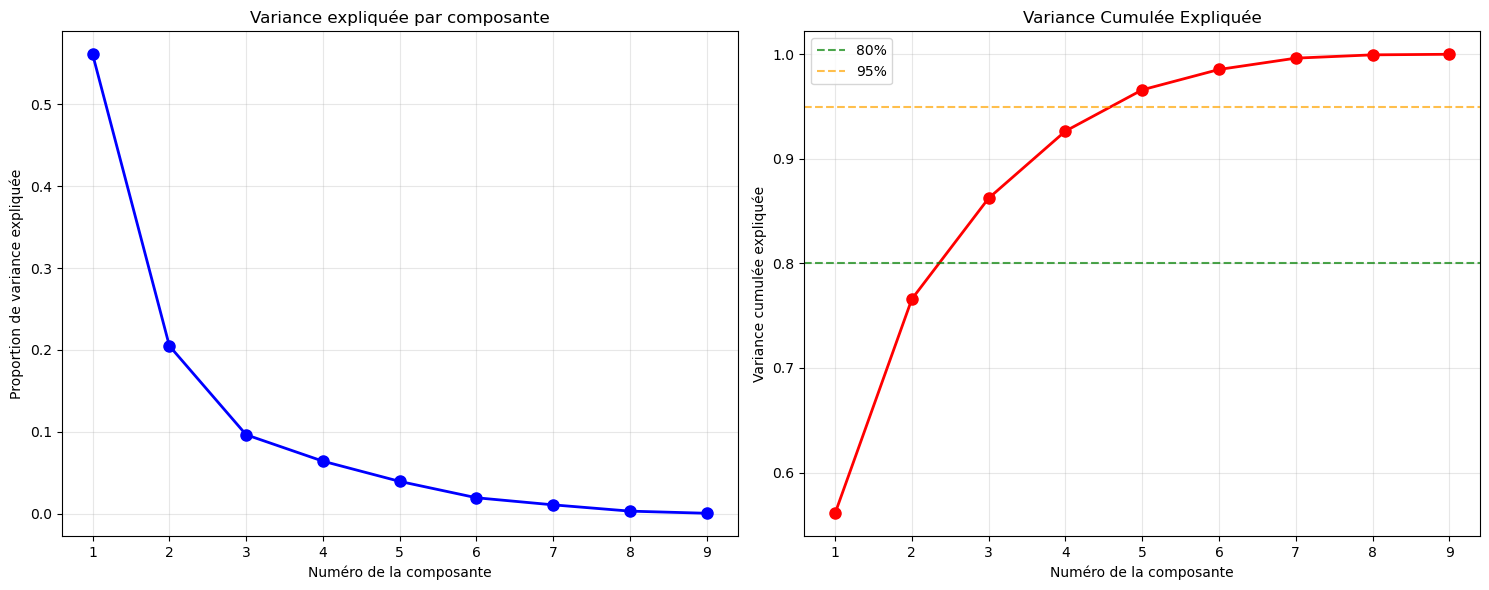

In [134]:
# Visualisation du scree plot (éboulis des valeurs propres)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique des valeurs propres
ax1.plot(range(1, len(variance_explained) + 1), variance_explained, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Numéro de la composante')
ax1.set_ylabel('Proportion de variance expliquée')
ax1.set_title('Variance expliquée par composante')
ax1.grid(True, alpha=0.3)

# Graphique de la variance cumulée
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='g', linestyle='--', alpha=0.7, label='80%')
ax2.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95%')
ax2.set_xlabel('Numéro de la composante')
ax2.set_ylabel('Variance cumulée expliquée')
ax2.set_title('Variance Cumulée Expliquée')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

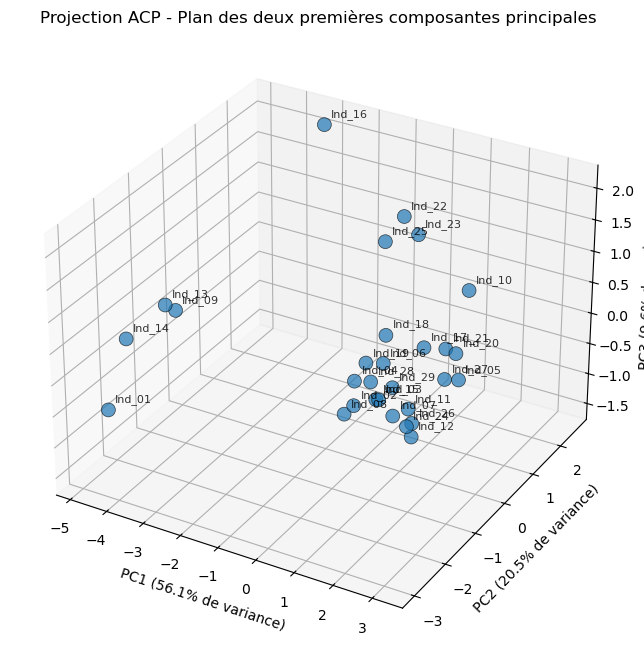

In [135]:
# Visualisation en 2D avec les deux premières composantes principales
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=100, alpha=0.7, edgecolors='black', linewidth=0.5)

# Ajout des étiquettes pour chaque point
for i, txt in enumerate(individus):
    ax.text(X_pca[i, 0]+0.1, X_pca[i, 1]+0.1, X_pca[i, 2]+0.1, txt.replace('Individu ', 'Ind_'), fontsize=8, alpha=0.8)

ax.set_xlabel(f'PC1 ({variance_explained[0]:.1%} de variance)')
ax.set_ylabel(f'PC2 ({variance_explained[1]:.1%} de variance)')
ax.set_zlabel(f'PC3 ({variance_explained[2]:.1%} de variance)')
plt.title('Projection ACP - Plan des deux premières composantes principales')
# plt.colorbar(scatter, label='Numéro individu')
plt.grid(True, alpha=0.3)
plt.show()


### t-SNE (t-Distributed Stochastic Neighbor Embedding)
Le t-SNE est une méthode de réduction de dimension utilisée surtout pour visualiser des données complexes (souvent en 2D ou 3D) tout en gardant les rapprochements locaux entre les points.

#### Fonctionnement

- Mesure des distances entre tous les points dans l’espace d’origine (souvent de grande dimension).
- Transformation de ces distances en probabilités (probas que deux points soient voisins).
- Dans un espace réduit (2D ou 3D), le t-SNE recherche une configuration où ces probabilités sont conservées au mieux.
- Les points proches restent proches, les points éloignés sont souvent plus dispersés.

La perplexity dans t-SNE est un paramètre clé qui contrôle la notion de voisinage. Elle détermine combien de voisins proches un point doit considérer comme importants.


In [136]:
# Application de t-SNE avec différents paramètres de perplexité
# Adaptation automatique selon la taille du dataset
n_samples = X_hd.shape[0]
print(f"Nombre d'échantillons: {n_samples}")
assert X_hd.shape[0] == 29

Nombre d'échantillons: 29


In [137]:
# La perplexité doit être < n_samples
perplexities = [5, 10, 20, min(30, n_samples-1)]
print(f"Perplexités testées: {perplexities}")

Perplexités testées: [5, 10, 20, 28]


In [138]:
def tsne_compute(perplexities: list[int]) -> dict:
    '''Calcule et affiche des projections t-SNE pour différentes valeurs de perplexité.'''
    
    tsne_results = {}
    
    for i, perp in enumerate(perplexities):
        print(f"Calcul t-SNE avec perplexité = {perp}...")
        
        # Utiliser max_iter au lieu de n_iter pour éviter le warning
        tsne = TSNE(n_components=2, perplexity=perp, random_state=42, max_iter=1000)
        X_tsne = tsne.fit_transform(X_scaled)
        tsne_results[perp] = X_tsne
        
        # Visualisation
        scatter = axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=range(len(individus)), 
                                 cmap='viridis', s=80, alpha=0.7, edgecolors='black', linewidth=0.5)
        
        # Ajout des étiquettes
        for j, txt in enumerate(individus):
            axes[i].annotate(txt.replace('Individu ', ''), (X_tsne[j, 0], X_tsne[j, 1]), 
                            xytext=(3, 3), textcoords='offset points', fontsize=7, alpha=0.8)
        
        axes[i].set_title(f't-SNE (perplexité = {perp})')
        axes[i].grid(True, alpha=0.3)
    
    # Masquer les axes inutilisés si nécessaire
    if n_plots < len(axes):
        for i in range(n_plots, len(axes)):
            axes[i].set_visible(False)

    return tsne_results

4
Calcul t-SNE avec perplexité = 5...
Calcul t-SNE avec perplexité = 10...
Calcul t-SNE avec perplexité = 20...
Calcul t-SNE avec perplexité = 28...


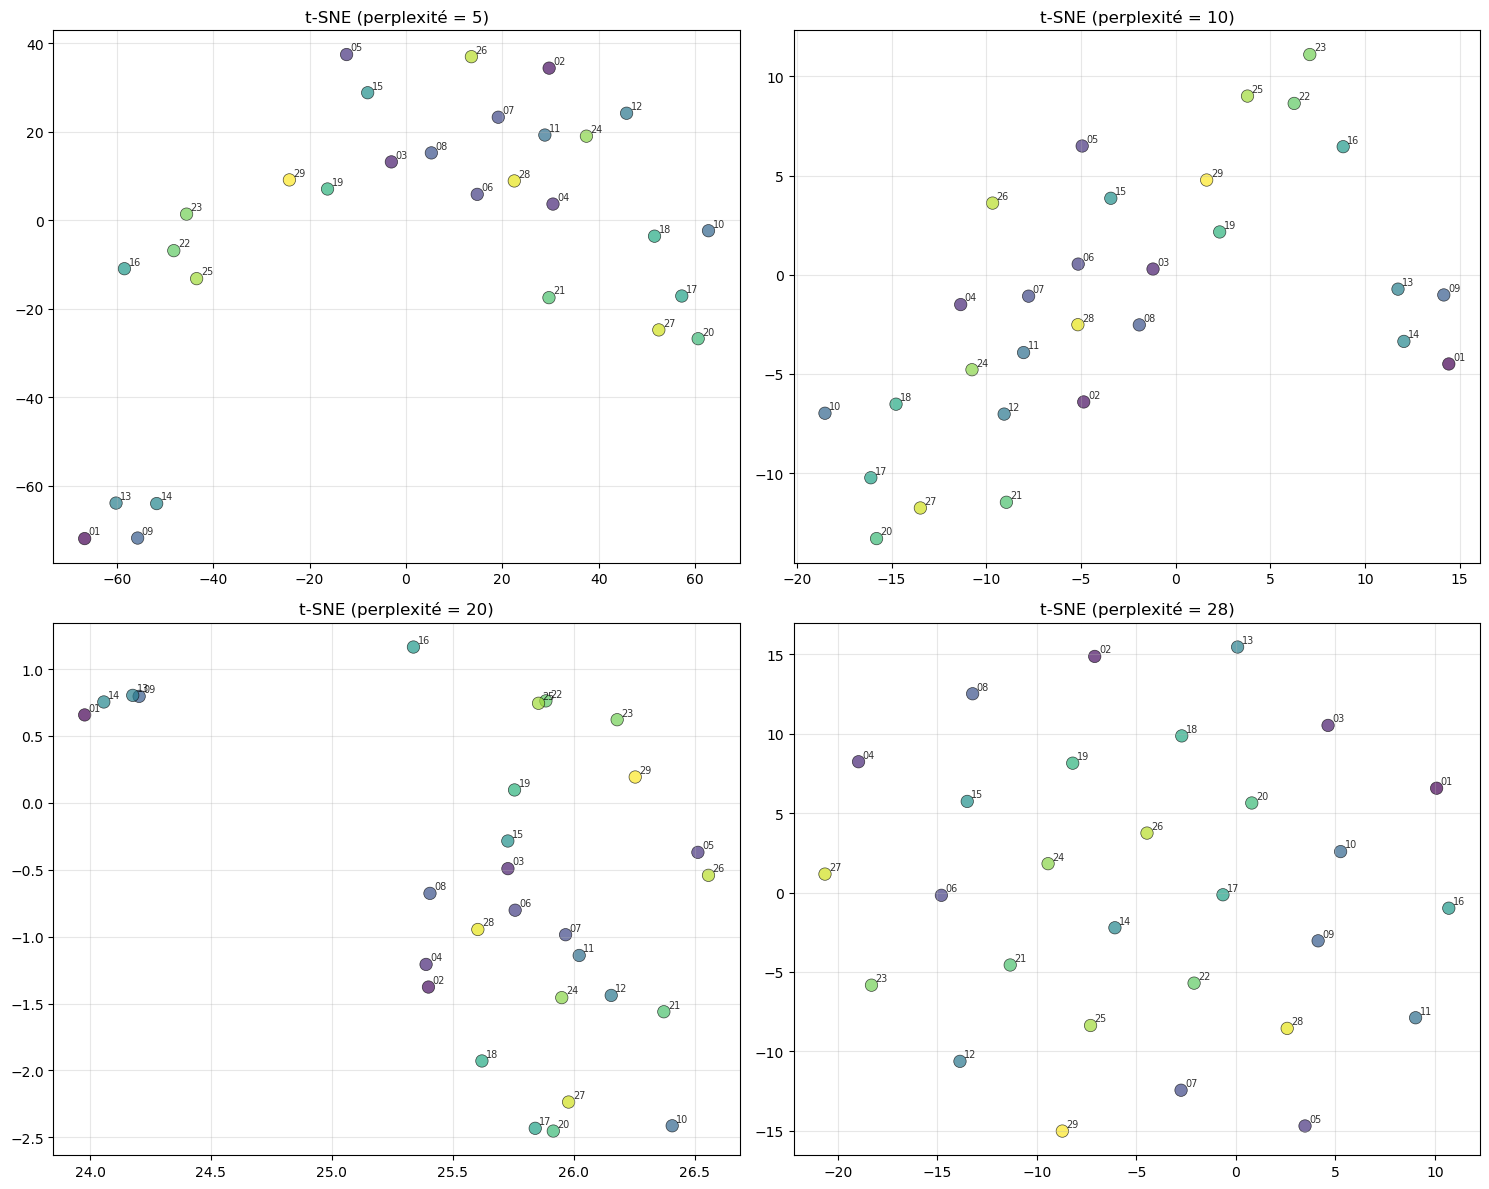

In [139]:
# Créer la grille de sous-graphiques
n_plots = len(perplexities)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

print(len(perplexities))
tsne_results = tsne_compute(perplexities)
plt.tight_layout()
plt.show()

In [140]:
# Choisir une perplexité optimale pour la suite
best_perplexity = perplexities[len(perplexities)//2]

X_tsne_final = tsne_results[best_perplexity]
print(f"""\
Utilisation de t-SNE avec perplexité = {best_perplexity} pour les analyses suivantes
""")

# Affichage d'informations sur la qualité du t-SNE
print(f"""\
Forme des données d'entrée: {X_scaled.shape}
Forme des données t-SNE: {X_tsne_final.shape}
""")

Utilisation de t-SNE avec perplexité = 20 pour les analyses suivantes

Forme des données d'entrée: (29, 9)
Forme des données t-SNE: (29, 2)



Le t-SNE permet de réduire la dimensionnalité des données de 9 à 2.

La perplexité de 20 signifie que t-SNE essaie de préserver la structure locale autour d’environ 20 voisins par point.

Regarder si des groupes ou clusters apparaissent naturellement :

- Des points proches représentent des observations similaires dans les 9 dimensions d'origine.
- Des points éloignés représentent des observations différentes.

### Détermination du nombre optimal de clusters

In [141]:
# Calcul des indices de qualité pour différents nombres de clusters
n_clusters_range = range(2, 11)
silhouette_scores = []
inertias = []

In [142]:
for n_clusters in n_clusters_range:
    # Classification avec CAH
    clusters = fcluster(Z_ward, n_clusters, criterion='maxclust')
    
    # Calcul du score de silhouette
    sil_score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(sil_score)
    
    # Calcul de l'inertie intra-cluster
    inertia = 0
    for cluster_id in np.unique(clusters):
        cluster_points = X_scaled[clusters == cluster_id]
        if len(cluster_points) > 1:
            centroid = cluster_points.mean(axis=0)
            inertia += np.sum((cluster_points - centroid) ** 2)
    inertias.append(inertia)

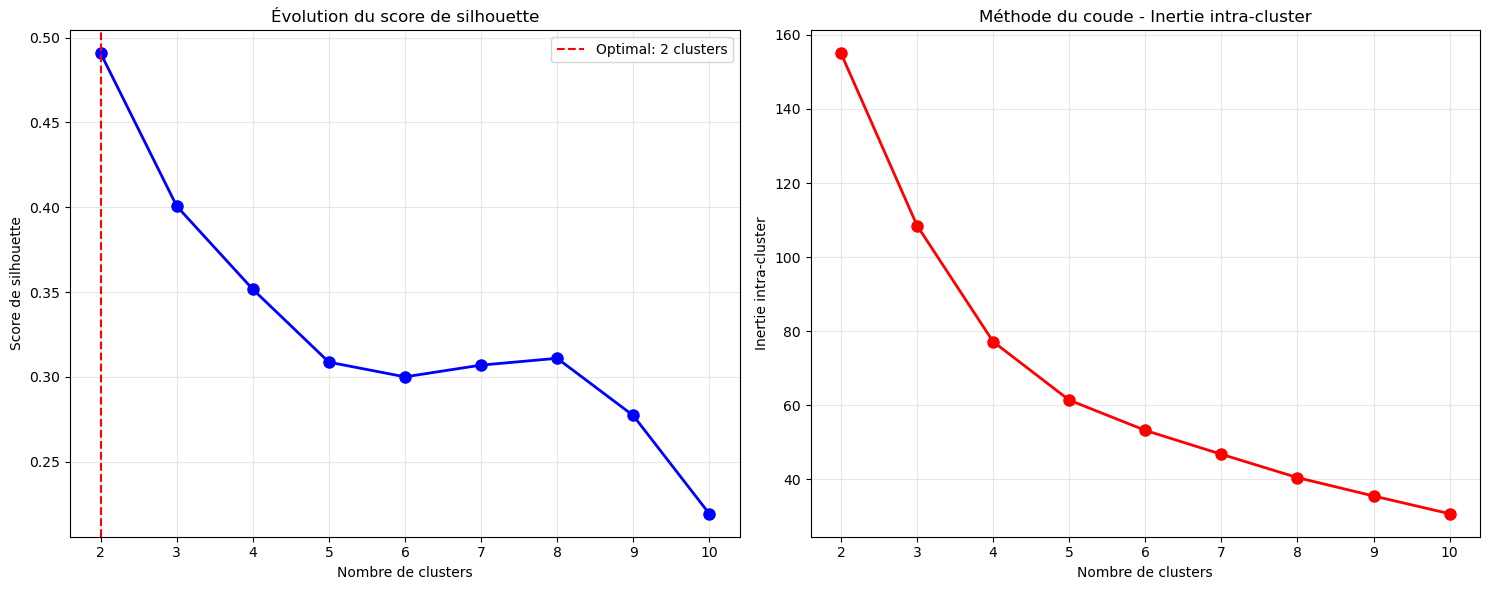

In [143]:
# Visualisation des indices de qualité
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Score de silhouette
ax1.plot(n_clusters_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Nombre de clusters')
ax1.set_ylabel('Score de silhouette')
ax1.set_title('Évolution du score de silhouette')
ax1.grid(True, alpha=0.3)
optimal_clusters_sil = n_clusters_range[np.argmax(silhouette_scores)]
ax1.axvline(x=optimal_clusters_sil, color='red', linestyle='--', 
           label=f'Optimal: {optimal_clusters_sil} clusters')
ax1.legend()

# Méthode du coude (inertie)
ax2.plot(n_clusters_range, inertias, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Nombre de clusters')
ax2.set_ylabel('Inertie intra-cluster')
ax2.set_title('Méthode du coude - Inertie intra-cluster')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [144]:
print(f"""\
Nombre optimal de clusters selon le score de silhouette: {optimal_clusters_sil}
Score de silhouette maximal: {max(silhouette_scores):.3f}\
""")

Nombre optimal de clusters selon le score de silhouette: 2
Score de silhouette maximal: 0.491



### Méthode du coude (Elbow method)

#### Principe

* On regarde l’inertie (ou "somme des distances entre les points et leur centre de cluster").
* Plus il y a de clusters, plus l’inertie diminue (les groupes sont plus petits).
* Mais à partir d’un certain nombre, ajouter plus de clusters n’apporte presque plus rien : la courbe forme un coude.

#### Application :

1. On teste plusieurs nombres de clusters.
2. On trace le graphe :
   nombre de clusters (k) en x, inertie en y.
3. On cherche le "coude" dans la courbe :
   → C’est là où la courbe change fortement de pente, puis commence à "s’aplatir".

Ce coude donne le nombre optimal de clusters.

Dans notre cas, pas de cassure significative.

### Indice de silhouette (Silhouette score)

Expliqué précedement en partie 6.1



### Analyse des clusters finaux

In [145]:
# Classification finale avec le nombre optimal de clusters
optimal_n_clusters = optimal_clusters_sil
final_clusters = fcluster(Z_ward, optimal_n_clusters, criterion='maxclust')

# Ajout des clusters au DataFrame
df_clustered = df_hd.copy()
df_clustered['Cluster'] = final_clusters

print(f"""\
Classification finale avec {optimal_n_clusters} clusters:
Répartition des individus par cluster:
""")

cluster_counts = pd.Series(final_clusters).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"  Cluster {cluster_id}: {count} individus")

Classification finale avec 2 clusters:
Répartition des individus par cluster:

  Cluster 1: 4 individus
  Cluster 2: 25 individus


In [146]:
# Analyse descriptive des clusters
print("\nAnalyse descriptive des clusters:")
print("="*50)

cluster_stats = df_hd.copy()
cluster_stats['Cluster'] = final_clusters

for cluster_id in sorted(np.unique(final_clusters)):
    print(f"\nCluster {cluster_id}:")
    cluster_data = cluster_stats[cluster_stats['Cluster'] == cluster_id]
    individuals_in_cluster = df_clustered[df_clustered['Cluster'] == cluster_id].index.tolist()
    print(f"Individus: {individuals_in_cluster}")
    print("Statistiques moyennes:")
    for col in df_hd.columns:
        mean_val = cluster_data[col].mean()
        std_val = cluster_data[col].std()
        print(f"  {col}: {mean_val:.2f} ± {std_val:.2f}")


Analyse descriptive des clusters:

Cluster 1:
Individus: ['Individu 01', 'Individu 09', 'Individu 13', 'Individu 14']
Statistiques moyennes:
  Données 1: 101.75 ± 33.05
  Données 2: 44.75 ± 31.94
  Données 3: 133.75 ± 61.85
  Données 4: 6.28 ± 3.43
  Données 5: 55.15 ± 10.46
  Données 6: 16.48 ± 9.12
  Données 7: 7.20 ± 2.29
  Données 8: 18.25 ± 8.88
  Données 9: 11.25 ± 1.89

Cluster 2:
Individus: ['Individu 02', 'Individu 03', 'Individu 04', 'Individu 05', 'Individu 06', 'Individu 07', 'Individu 08', 'Individu 10', 'Individu 11', 'Individu 12', 'Individu 15', 'Individu 16', 'Individu 17', 'Individu 18', 'Individu 19', 'Individu 20', 'Individu 21', 'Individu 22', 'Individu 23', 'Individu 24', 'Individu 25', 'Individu 26', 'Individu 27', 'Individu 28', 'Individu 29']
Statistiques moyennes:
  Données 1: 331.76 ± 46.03
  Données 2: 236.54 ± 91.47
  Données 3: 194.05 ± 71.67
  Données 4: 27.02 ± 3.72
  Données 5: 69.55 ± 25.25
  Données 6: 12.46 ± 12.15
  Données 7: 22.24 ± 4.83
  Donnée

Cluster 1 :

- Petit groupe, probablement atypique ou marginal.
- Valeurs beaucoup plus basses que le reste du groupe sur presque toutes les variables.
- Peut représenter un profil particulier, une anomalie ou un groupe à part.

Cluster 2 :

- Groupe principal, contenant la majorité des individus.
- Valeurs globalement élevées.
- Représente sans doute la population "normale" ou dominante dans l’échantillon.

### Heatmap des distances

In [147]:
# Calcul de la matrice de distances
distance_matrix = squareform(pdist(X_scaled, metric='euclidean'))
distance_df = pd.DataFrame(distance_matrix, index=individus, columns=individus)

# Réorganisation selon les clusters
cluster_order = np.argsort(final_clusters)
ordered_individuals = [individus[i] for i in cluster_order]
ordered_distance_matrix = distance_df.loc[ordered_individuals, ordered_individuals]

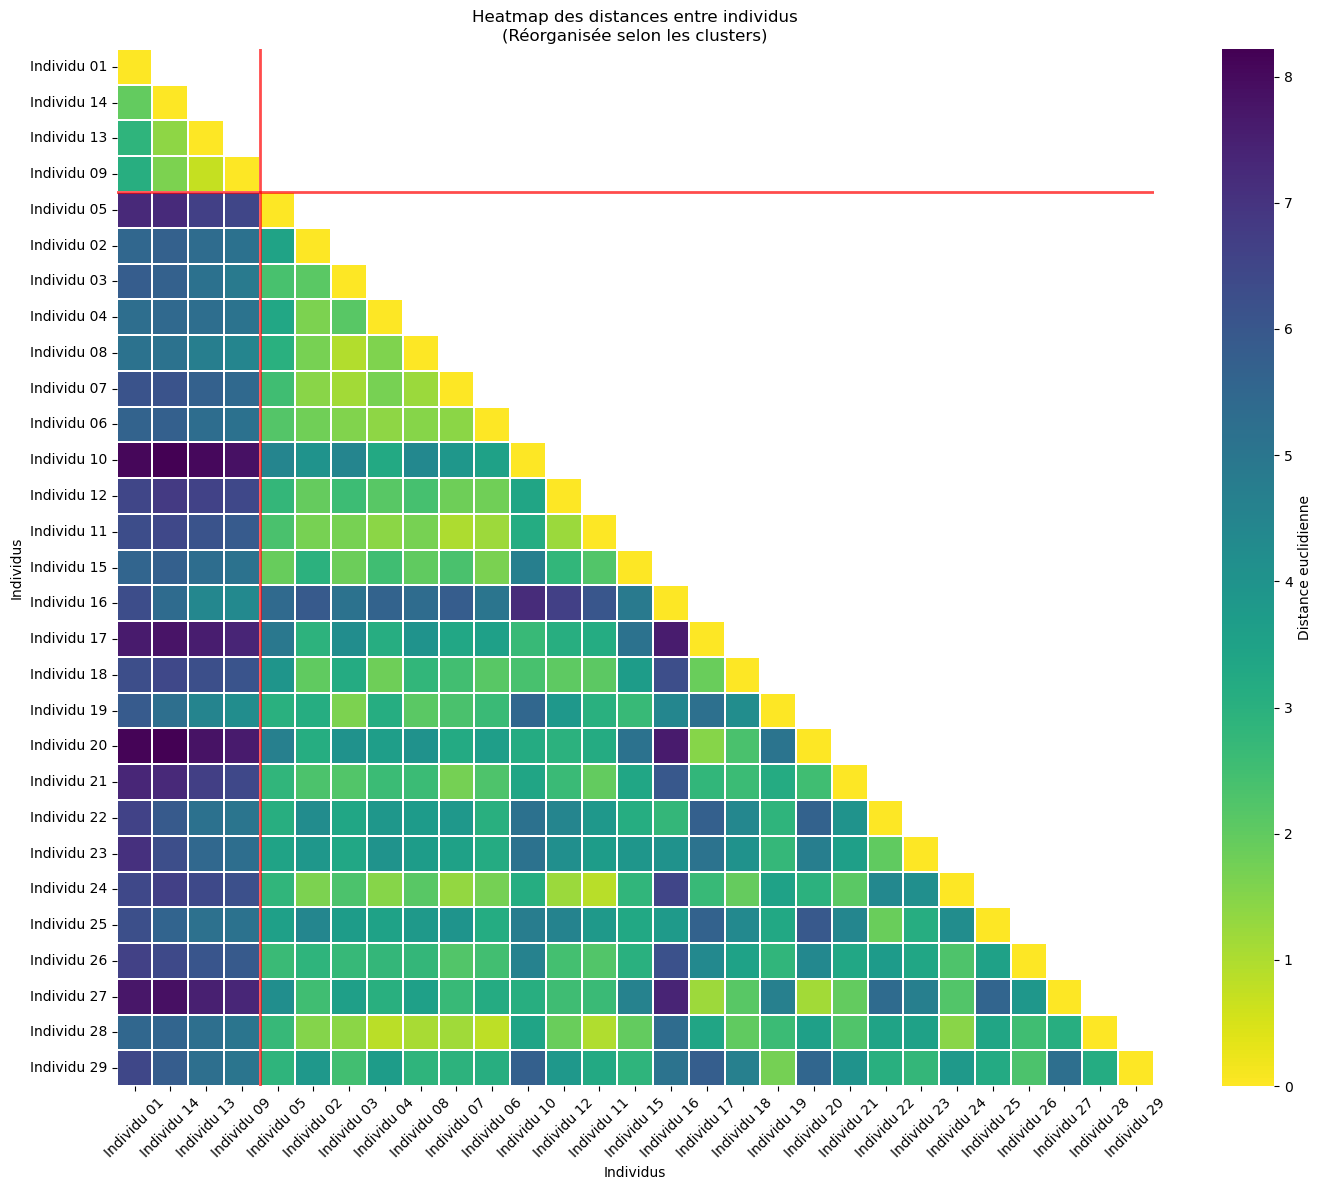

In [148]:
# Création de la heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(ordered_distance_matrix, dtype=bool), k=1)
sns.heatmap(ordered_distance_matrix, 
            annot=False, 
            cmap='viridis_r', 
            square=True,
            linewidths=0.1,
            cbar_kws={'label': 'Distance euclidienne'},
            mask=mask)
plt.title('Heatmap des distances entre individus\n(Réorganisée selon les clusters)')
plt.xlabel('Individus')
plt.ylabel('Individus')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Ajout des séparateurs de clusters
cluster_boundaries = []
current_cluster = final_clusters[cluster_order[0]]
boundary = 0

for i, cluster in enumerate(final_clusters[cluster_order]):
    if cluster != current_cluster:
        cluster_boundaries.append(i)
        current_cluster = cluster

cluster_boundaries.append(len(final_clusters))

for boundary in cluster_boundaries[:-1]:
    plt.axhline(y=boundary, color='red', linewidth=2, alpha=0.7)
    plt.axvline(x=boundary, color='red', linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

#### Présence de clusters distincts

Les blocs de couleurs similaires indiquent des groupes d’individus proches les uns des autres — autrement dit, des clusters.

#### Lignes rouges : séparation visuelle des clusters

Les lignes rouges horizontale et verticale permettent de distinguer deux sous-groupes principaux :

* Le premier groupe semble composé des individus 01, 13, 14, 09, avec de faibles distances intra-groupe.
* Le second groupe, autres individus, est plus hétérogène, avec des distances intra-groupe parfois plus élevées.

#### Interprétation des couleurs

* Jaune = distance proche de 0 (individus très similaires).
* Bleu/vert = distances moyennes.
* Violet foncé = individus très dissemblables.

Cela suggère une forte homogénéité dans certains sous-groupes, et davantage de variabilité dans d'autres, notamment dans la seconde moitié des individus.

#### Conclusion

Cette heatmap est utile pour visualiser visuellement les similarités dans une population et identifier les regroupements naturels. Ici, on perçoit clairement au moins deux clusters principaux, avec une cohésion interne variable.


### Visualisation finale des clusters

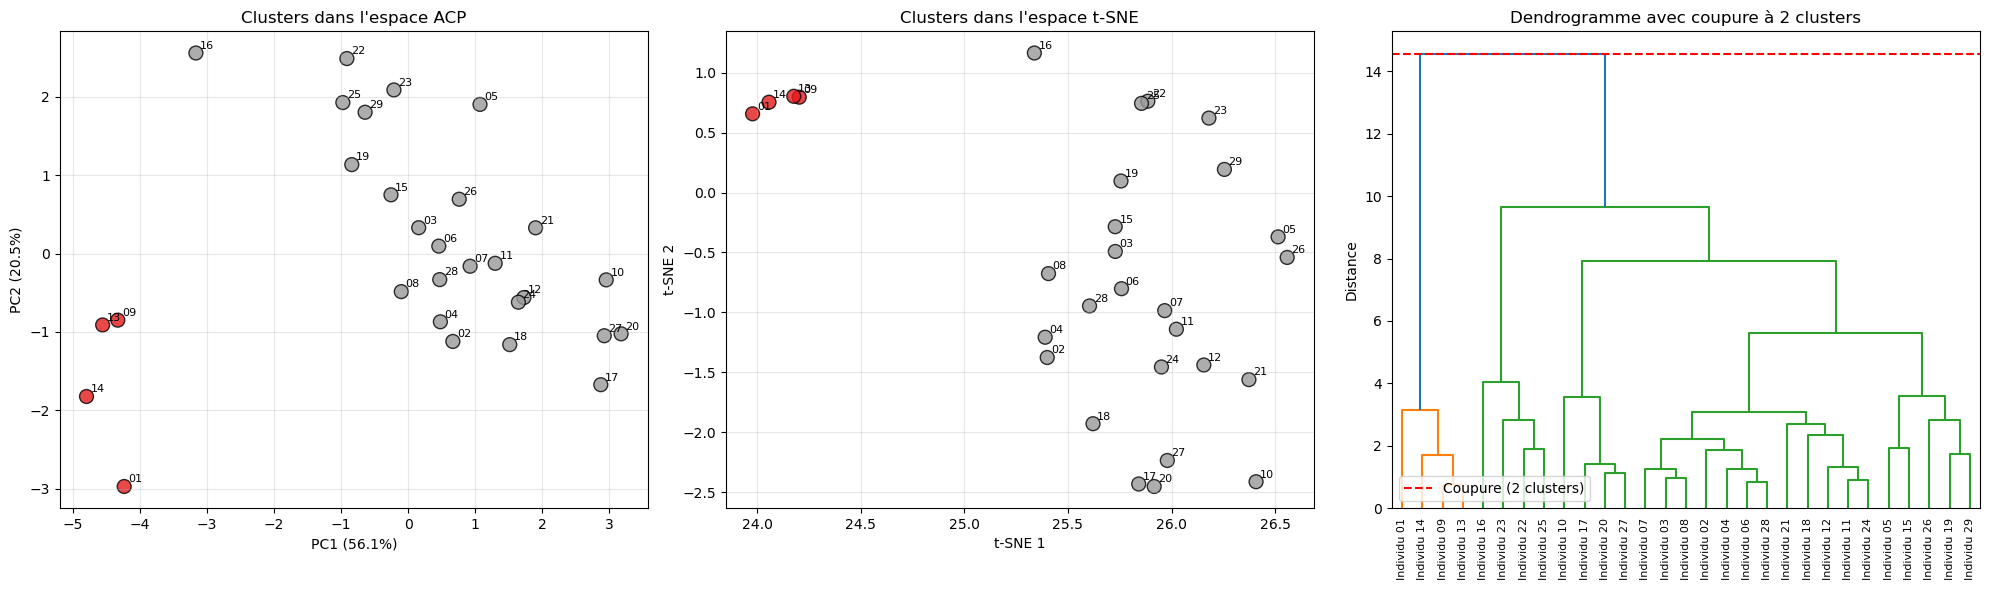

In [149]:
# Visualisation des clusters dans l'espace ACP
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Dans l'espace ACP
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=final_clusters, 
                          cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
for i, txt in enumerate(individus):
    axes[0].annotate(txt.replace('Individu ', ''), (X_pca[i, 0], X_pca[i, 1]), 
                    xytext=(3, 3), textcoords='offset points', fontsize=8)
axes[0].set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
axes[0].set_title('Clusters dans l\'espace ACP')
axes[0].grid(True, alpha=0.3)

# Dans l'espace t-SNE
scatter2 = axes[1].scatter(X_tsne_final[:, 0], X_tsne_final[:, 1], c=final_clusters, 
                          cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
for i, txt in enumerate(individus):
    axes[1].annotate(txt.replace('Individu ', ''), (X_tsne_final[i, 0], X_tsne_final[i, 1]), 
                    xytext=(3, 3), textcoords='offset points', fontsize=8)
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].set_title('Clusters dans l\'espace t-SNE')
axes[1].grid(True, alpha=0.3)

# Dendrogramme avec coupure
dendrogram(Z_ward, labels=individus, ax=axes[2], leaf_rotation=90, leaf_font_size=8,
          color_threshold=Z_ward[-optimal_n_clusters+1, 2])
axes[2].set_title(f'Dendrogramme avec coupure à {optimal_n_clusters} clusters')
axes[2].set_ylabel('Distance')
axes[2].axhline(y=Z_ward[-optimal_n_clusters+1, 2], color='red', linestyle='--', 
               label=f'Coupure ({optimal_n_clusters} clusters)')
axes[2].legend()

plt.tight_layout()
plt.show()

Ces trois graphiques présentent une analyse de clustering à l’aide de différentes méthodes de visualisation et montrent une séparation en 2 clusters.

#### Interprétation :

* L’analyse combinée des espaces ACP, t-SNE et du dendrogramme montre un groupe clairement isolé et cohérent d’individus atypiques (cluster rouge).
* Cette séparation en 2 clusters est robuste : elle est confirmée par plusieurs méthodes de réduction de dimension et par la hiérarchie des distances entre individus.


### Comparaison avec d'autres méthodes de clustering

In [150]:
# Comparaison avec K-means
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Calcul de l'indice de Rand ajusté pour comparer les méthodes
ari_score = adjusted_rand_score(final_clusters, kmeans_clusters)
print(f"Indice de Rand ajusté entre CAH et K-means: {ari_score:.3f}")

Indice de Rand ajusté entre CAH et K-means: 0.826


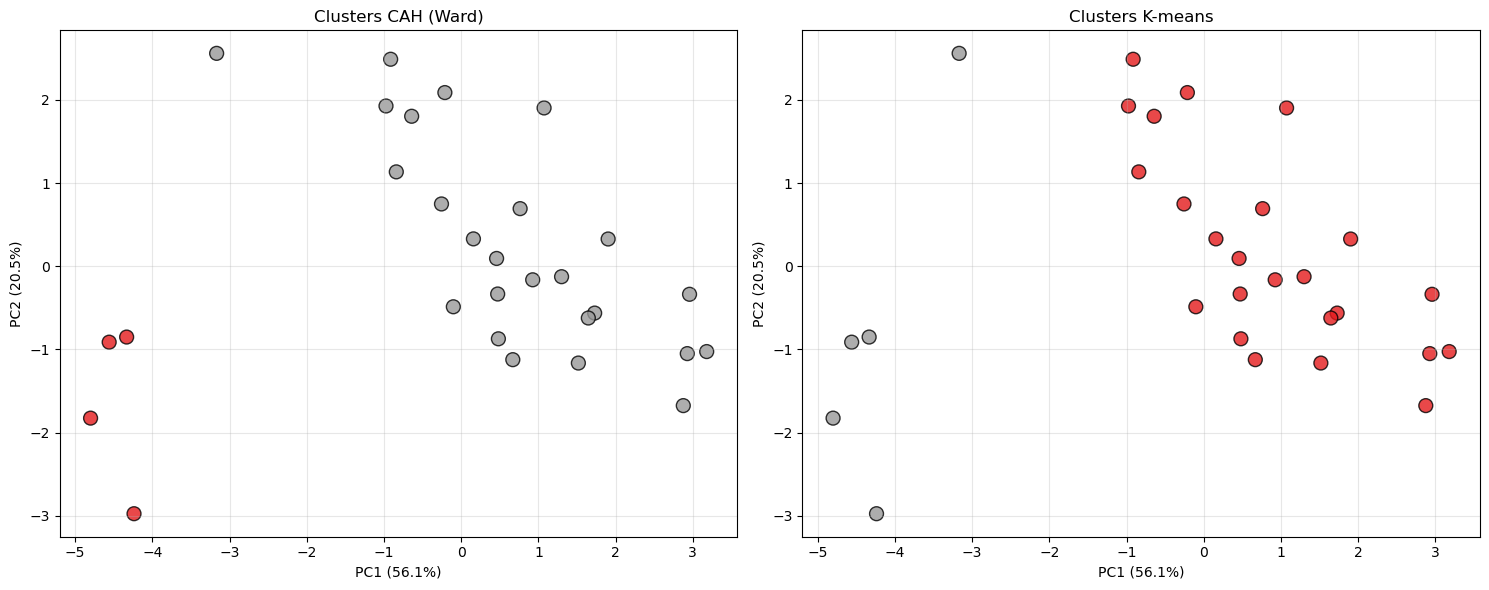

In [151]:
# Visualisation comparative
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# CAH
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=final_clusters, 
                      cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
ax1.set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
ax1.set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
ax1.set_title('Clusters CAH (Ward)')
ax1.grid(True, alpha=0.3)

# K-means
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, 
                      cmap='Set1', s=100, alpha=0.8, edgecolors='black', linewidth=1)
ax2.set_xlabel(f'PC1 ({variance_explained[0]:.1%})')
ax2.set_ylabel(f'PC2 ({variance_explained[1]:.1%})')
ax2.set_title('Clusters K-means')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Ces graphiques présentent les résultats de deux méthodes de clustering appliquées au jeu de données projeté sur deux composantes principales (PC1 et PC2) de l'ACP.

#### Clusters CAH (Classification Ascendante Hiérarchique) – méthode de Ward

* Deux groupes sont visibles, représentés par des couleurs différentes (gris et rouge).
* Les points rouges (à gauche, proches de PC1 = -4) forment un petit groupe très compact et bien séparé du reste.
* Le groupe gris est plus grand, mais aussi plus dispersé.

#### Clusters K-means

* Même nombre de clusters, mais la répartition est différente.
* Les points rouges représentent ici la majorité des observations.
* Le groupe gris est plus étendu que dans le cas CAH.

#### Interprétation :

* La méthode CAH (Ward) a identifié un petit groupe d'individus atypiques (points rouges) qui sont assez différents des autres selon les deux premières composantes principales.
* Elle privilégie la séparation nette des groupes, quitte à former un petit cluster.

* Le K-means privilégie une répartition plus équilibrée en taille entre les clusters.
* Il tend à minimiser la variance intra-cluster et peut intégrer dans un grand groupe des individus qui sont en fait éloignés (ce qui peut être un problème s’ils sont atypiques).
* Ici, le point gris extrême (en haut du graphe) est dans le même groupe que ceux du bas à gauche.

Le choix entre les deux dépend du but de l’analyse : recherche d’anomalies (CAH) ou partition homogène (K-means).



## Conclusion

Cette analyse nous a permis de :

1. Réduire la dimensionnalité avec l'ACP pour identifier les principales sources de variation
2. Visualiser la structure des données avec t-SNE pour révéler les patterns locaux